In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_datareader as web
import datetime as dt
import yfinance as yf
yf.pdr_override()

# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.layers import Dense, Dropout, LSTM
# from tensorflow.keras.models import Sequential


In [2]:
# Extracting real time data for 30 coins from yahoo finance
crypto_names = ['Bitcoin', 'Ethereum', 'BNB', 'Tether', 'Solana', 'Cardano','Polkadot','XRP','Dogecoin','Avalanche',
                'Terra','USD Coin','Cosmos','Algorand','Shiba Inu','Bitcoin Cash','Cronos',
                'Litecoin','Uniswap','FTX Token','SushiSwap','The Graph','Internet Computer','Filecoin','VeChain','Dai',
               'BitTorrent','Celsius','Ren','Zcash','NEM','Theta Network','Maker','Neo','Harmony','PancakeSwap',
                'MultiversX','Huobi Token','Waves','Serum','Kusama']

crypto_symbol = ['BTC','ETH', 'BNB','USDT','SOL','ADA','DOT','XRP','DOGE','AVAX','LUNA20314','CELO','USDC',
                 'ATOM','ALGO','SHIB','BCH','CRO','LTC','UNI7083','FTT','SUSHI','GRT6719','ICP','FIL','VET','DAI','BTTOLD',
                 'REN','ZEC','XEM','THETA','MKR','NEO','ONE','CAKE','EGLD','HT','WAVES','SRM','KSM']

start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()

crypto_dfs = []
for coin in crypto_symbol:
    coin_index= crypto_symbol.index(coin)
    data = yf.download([f'{coin}-USD'], start=start, end=end)
    crypto_df= pd.DataFrame(data)
    crypto_df['name'] = crypto_names[coin_index]
    crypto_df['symbol'] = coin
    crypto_dfs.append(crypto_df)

all_crypto_df = pd.concat(crypto_dfs)
all_crypto_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
# printing dataframe of the cryptocurrencies
print(all_crypto_df.shape)

all_crypto_df = all_crypto_df.round(2)
all_crypto_df

(20288, 8)


Open      High       Low     Close  Adj Close       Volume  \
Date                                                                         
2022-01-01  46311.75  47827.31  46288.48  47686.81   47686.81  24582667004   
2022-01-02  47680.93  47881.41  46856.94  47345.22   47345.22  27951569547   
2022-01-03  47343.54  47510.73  45835.96  46458.12   46458.12  33071628362   
2022-01-04  46458.85  47406.55  45752.46  45897.57   45897.57  42494677905   
2022-01-05  45899.36  46929.05  42798.22  43569.00   43569.00  36851084859   
...              ...       ...       ...       ...        ...          ...   
2023-05-09     25.68     25.98     25.44     25.86      25.86      7224688   
2023-05-10     25.86     26.75     25.29     26.39      26.39     13726830   
2023-05-11     26.39     26.39     24.29     25.14      25.14     14303475   
2023-05-12     25.14     25.32     24.30     25.30      25.30     13601651   
2023-05-14     24.92     25.71     24.71     25.66      25.66      6810527   

               name symbol  
Date                        
2022-01-01  Bitcoin    BTC  
2022-01-02  Bitcoin    BTC  
2022-01-03  Bitcoin    BTC  
2022-01-04  Bitcoin    BTC  
2022-01-05  Bitcoin    BTC  
...             ...    ...  
2023-05-09   Kusama    KSM  
2023-05-10   Kusama    KSM  
2023-05-11   Kusama    KSM  
2023-05-12   Kusama    KSM  
2023-05-14   Kusama    KSM  

[20288 rows x 8 columns]

In [5]:
# Check the data types.
print(all_crypto_df.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
name          object
symbol        object
dtype: object


In [6]:
# Check the data shape.
print(all_crypto_df.shape)

(20288, 8)


In [7]:
# Check for missing values in the data set

print(all_crypto_df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
name         0
symbol       0
dtype: int64


In [11]:
# Dropping the adjusted close values to reduce noise

all_crypto_df.drop('Adj Close', axis=1 , inplace=True)
all_crypto_df

Open      High       Low     Close       Volume     name  \
Date                                                                       
2022-01-01  46311.75  47827.31  46288.48  47686.81  24582667004  Bitcoin   
2022-01-02  47680.93  47881.41  46856.94  47345.22  27951569547  Bitcoin   
2022-01-03  47343.54  47510.73  45835.96  46458.12  33071628362  Bitcoin   
2022-01-04  46458.85  47406.55  45752.46  45897.57  42494677905  Bitcoin   
2022-01-05  45899.36  46929.05  42798.22  43569.00  36851084859  Bitcoin   
...              ...       ...       ...       ...          ...      ...   
2023-05-09     25.68     25.98     25.44     25.86      7224688   Kusama   
2023-05-10     25.86     26.75     25.29     26.39     13726830   Kusama   
2023-05-11     26.39     26.39     24.29     25.14     14303475   Kusama   
2023-05-12     25.14     25.32     24.30     25.30     13601651   Kusama   
2023-05-14     24.92     25.71     24.71     25.66      6810527   Kusama   

           symbol  
Date               
2022-01-01    BTC  
2022-01-02    BTC  
2022-01-03    BTC  
2022-01-04    BTC  
2022-01-05    BTC  
...           ...  
2023-05-09    KSM  
2023-05-10    KSM  
2023-05-11    KSM  
2023-05-12    KSM  
2023-05-14    KSM  

[20288 rows x 7 columns]

In [14]:
# Creating subdataframe for each coin

Ethereum_df = all_crypto_df[all_crypto_df.name=='Ethereum']
Ethereum_df

Open     High      Low    Close       Volume      name symbol
Date                                                                        
2022-01-01  3683.05  3769.92  3682.29  3769.70   9776191466  Ethereum    ETH
2022-01-02  3769.30  3836.16  3727.36  3829.56   9881471548  Ethereum    ETH
2022-01-03  3829.54  3836.20  3698.05  3761.38  12080777893  Ethereum    ETH
2022-01-04  3761.36  3876.79  3723.35  3794.06  14030925983  Ethereum    ETH
2022-01-05  3794.27  3842.06  3456.75  3550.39  18061338502  Ethereum    ETH
...             ...      ...      ...      ...          ...       ...    ...
2023-05-10  1848.21  1886.80  1795.67  1842.40   9945549603  Ethereum    ETH
2023-05-11  1842.49  1842.49  1774.13  1796.49   8353828312  Ethereum    ETH
2023-05-12  1795.18  1812.42  1742.40  1808.02   9047198660  Ethereum    ETH
2023-05-13  1808.38  1816.06  1788.48  1796.11   4647630864  Ethereum    ETH
2023-05-14  1796.40  1823.35  1794.38  1813.63   4681366528  Ethereum    ETH

[499 rows x 7 columns]

In [15]:
# Creating subdataframe for Bitcoin

Bitcoin_df = all_crypto_df[all_crypto_df.name=='Bitcoin']
Bitcoin_df

Open      High       Low     Close       Volume     name  \
Date                                                                       
2022-01-01  46311.75  47827.31  46288.48  47686.81  24582667004  Bitcoin   
2022-01-02  47680.93  47881.41  46856.94  47345.22  27951569547  Bitcoin   
2022-01-03  47343.54  47510.73  45835.96  46458.12  33071628362  Bitcoin   
2022-01-04  46458.85  47406.55  45752.46  45897.57  42494677905  Bitcoin   
2022-01-05  45899.36  46929.05  42798.22  43569.00  36851084859  Bitcoin   
...              ...       ...       ...       ...          ...      ...   
2023-05-10  27654.64  28322.69  26883.67  27621.76  20656025026  Bitcoin   
2023-05-11  27621.09  27621.94  26781.83  27000.79  16724343943  Bitcoin   
2023-05-12  26987.66  27055.65  25878.43  26804.99  19313599897  Bitcoin   
2023-05-13  26807.77  27030.48  26710.87  26784.08   9999171605  Bitcoin   
2023-05-14  26785.41  27135.09  26678.55  27035.36  10072923136  Bitcoin   

           symbol  
Date               
2022-01-01    BTC  
2022-01-02    BTC  
2022-01-03    BTC  
2022-01-04    BTC  
2022-01-05    BTC  
...           ...  
2023-05-10    BTC  
2023-05-11    BTC  
2023-05-12    BTC  
2023-05-13    BTC  
2023-05-14    BTC  

[499 rows x 7 columns]

# Univariate Analysis

In [16]:
# Calculating basic statistics for each column in the data set

all_crypto_df.describe()

Open          High           Low         Close        Volume
count  20288.000000  20288.000000  20288.000000  20288.000000  2.028800e+04
mean     771.054479    786.742489    753.537816    769.861152  1.056049e+10
std     4464.051238   4550.230728   4365.553554   4456.487783  8.006723e+11
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00
25%        0.380000      0.400000      0.370000      0.380000  3.944262e+07
50%        3.390000      3.505000      3.280000      3.370000  1.395025e+08
75%       30.507500     31.540000     29.400000     30.395000  5.748676e+08
max    47680.930000  48086.840000  47100.440000  47686.810000  8.325207e+13

In [17]:
# Calculating basic statistics for bitcoin in the data set

Bitcoin_df.describe()

Open          High           Low         Close        Volume
count    499.000000    499.000000    499.000000    499.000000  4.990000e+02
mean   27310.494910  27833.603507  26722.663848  27272.446633  2.803522e+10
std     9099.471796   9285.197280   8857.441015   9060.350613  1.221486e+10
min    15782.300000  16253.050000  15599.050000  15787.280000  7.714767e+09
25%    20117.190000  20391.835000  19663.510000  20115.580000  1.963914e+10
50%    23561.450000  24121.640000  23176.550000  23561.210000  2.651870e+10
75%    36159.115000  36528.835000  34404.235000  35771.435000  3.273764e+10
max    47680.930000  48086.840000  47100.440000  47686.810000  1.189925e+11

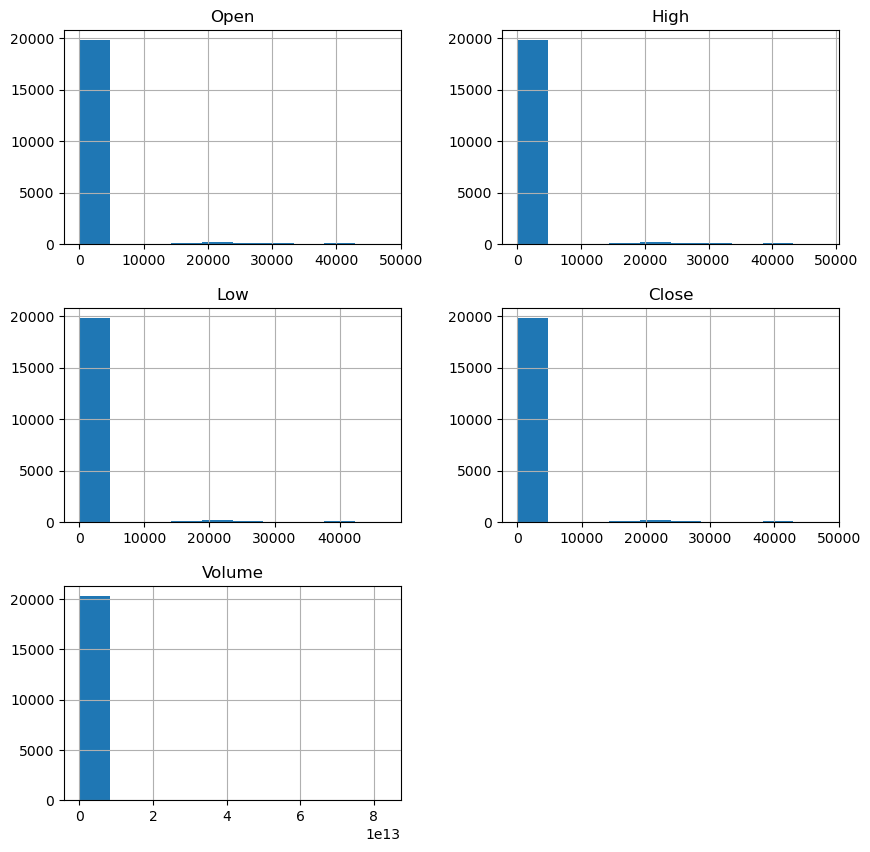

In [19]:
# Histogram plot to check for skewness
from matplotlib import pyplot

all_crypto_df.hist(figsize =(10,10))
pyplot.show()

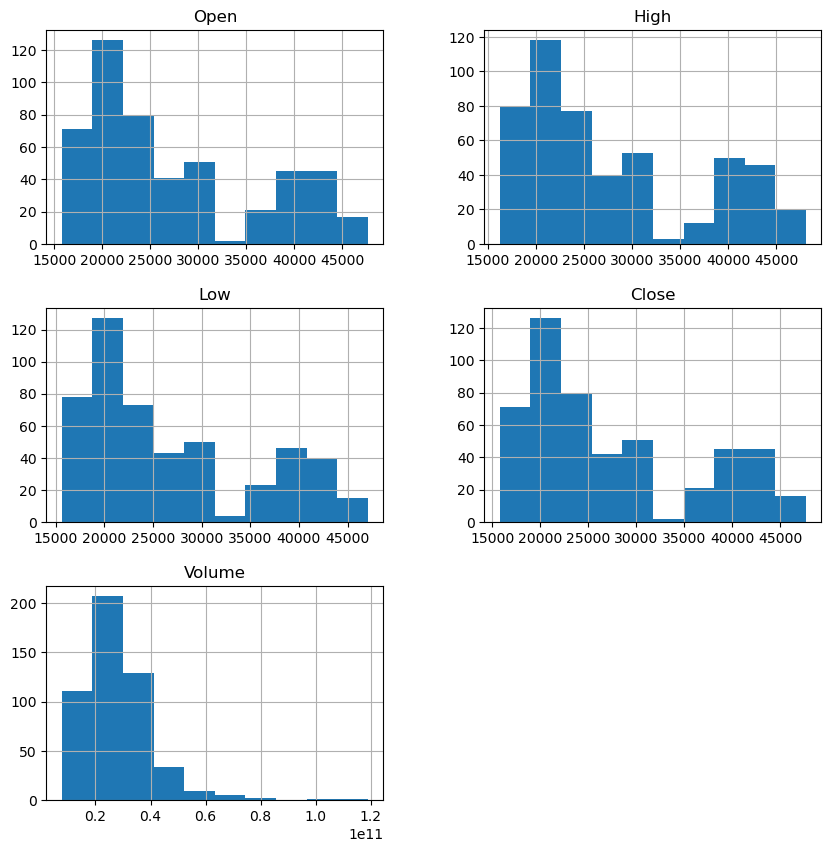

In [20]:
# Histogram plot to check for skewness in Bitcoin
from matplotlib import pyplot

Bitcoin_df.hist(figsize =(10,10))
pyplot.show()

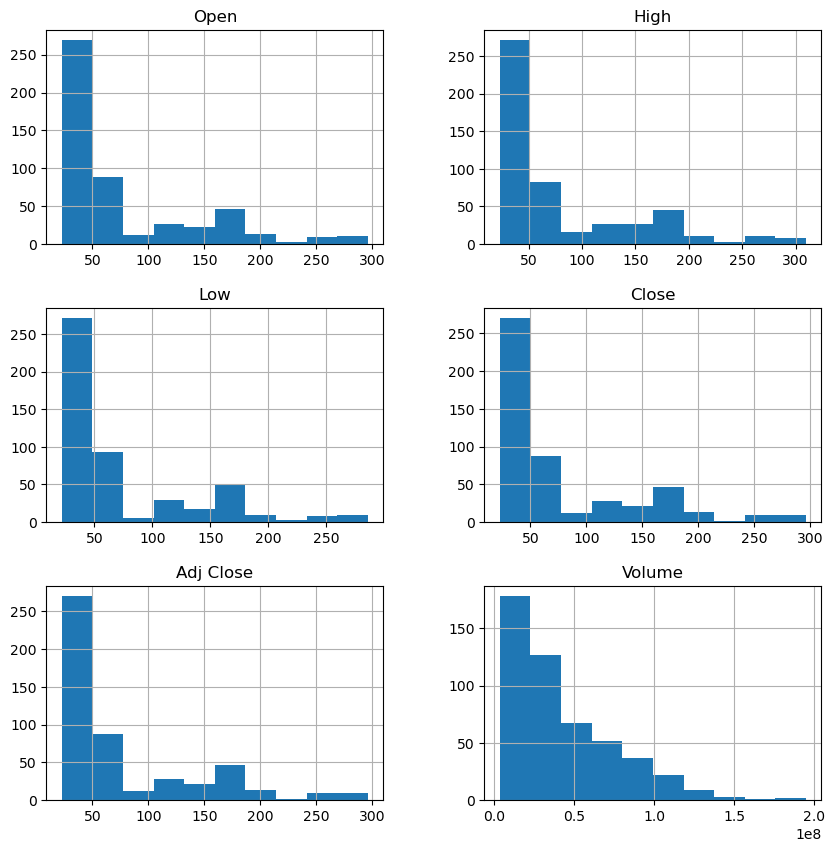

In [30]:
# Histogram plot of all coins
crypto_df.hist(bins=10, figsize=(10,10))
plt.show()

In [22]:
# print skewness value by iterating over each column
from scipy.stats import skew
for column in Bitcoin_df.select_dtypes(include='number'):
    skewness = skew(Bitcoin_df[column])
    print(f"{column}: {skewness:.2f}")

Open: 0.70
High: 0.68
Low: 0.71
Close: 0.70
Volume: 2.18


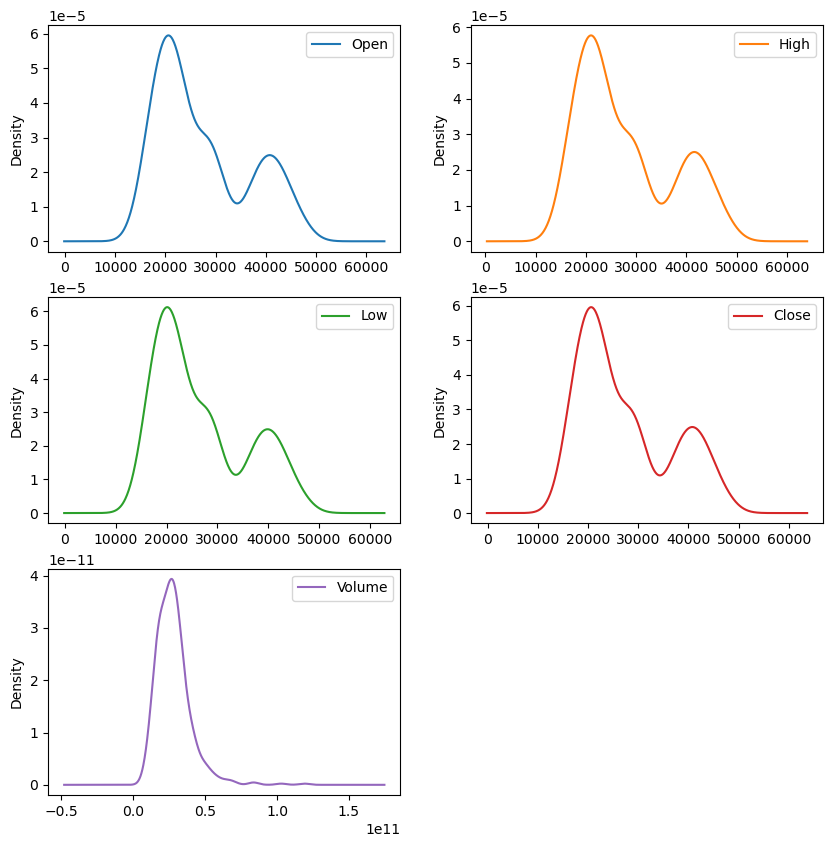

In [25]:
#  density plots for skewness observation                     
Bitcoin_df.plot(kind='density',subplots=True, layout = (3,2), sharex =False, figsize =(10,10))
pyplot.show()

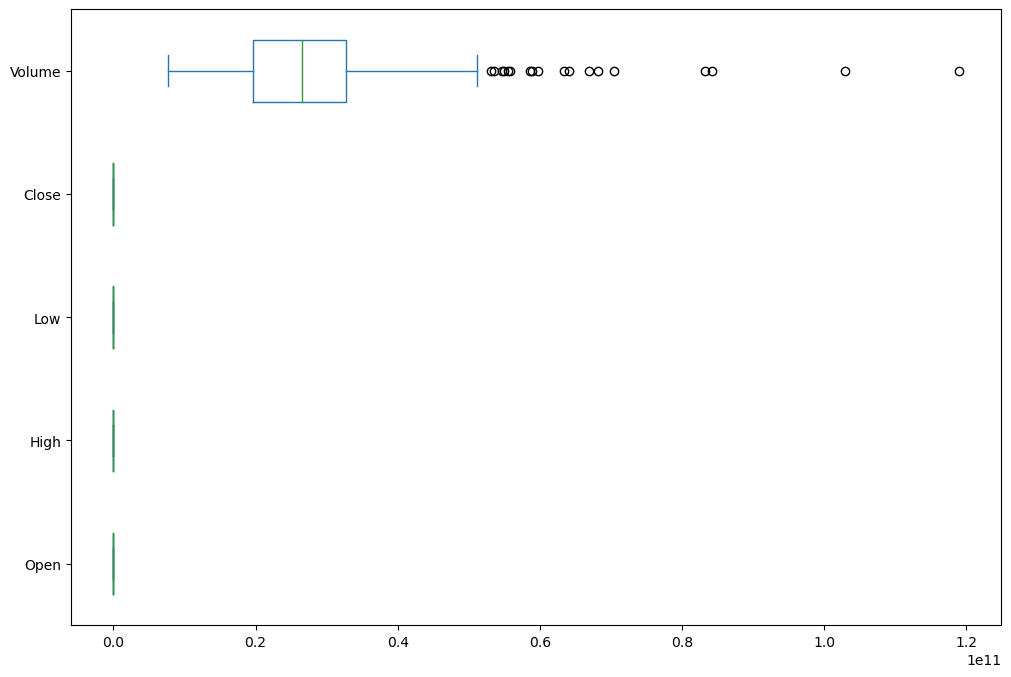

In [26]:
# Create a box plot for each column in the DataFrame
Bitcoin_df.plot(kind='box', vert=False, figsize=(12, 8))

# Show the plot
plt.show()

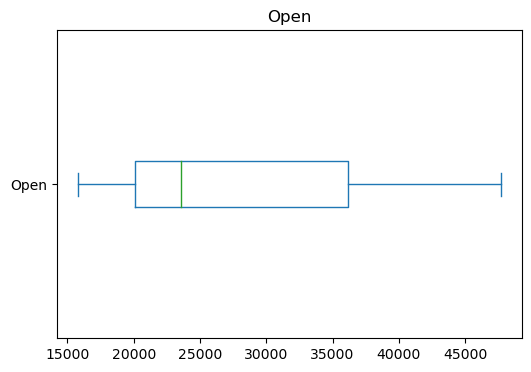

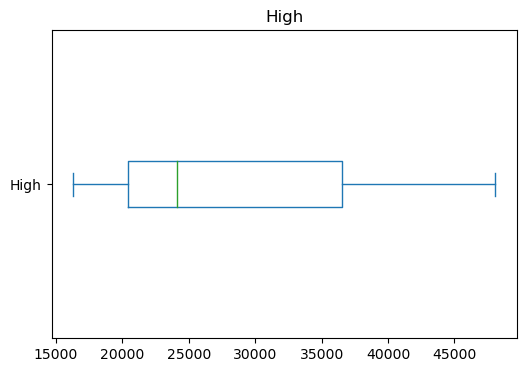

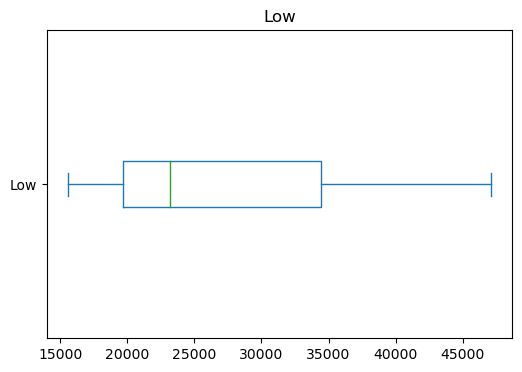

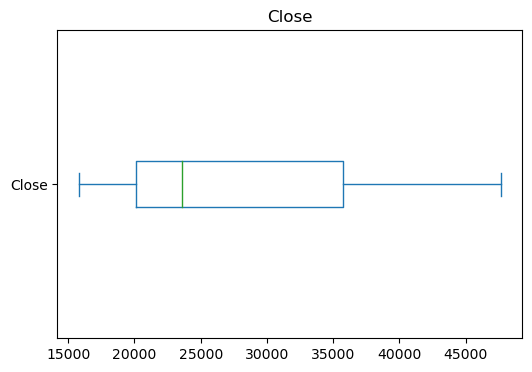

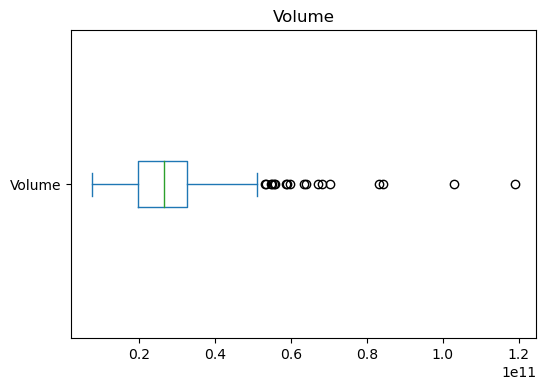

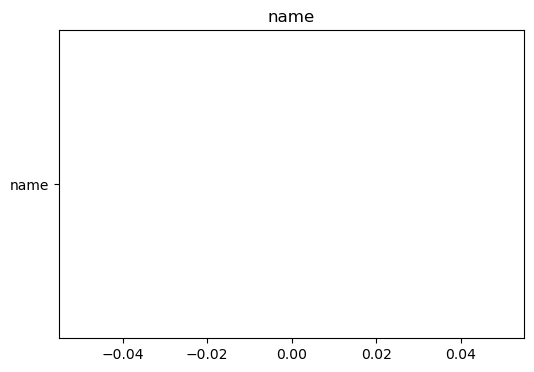

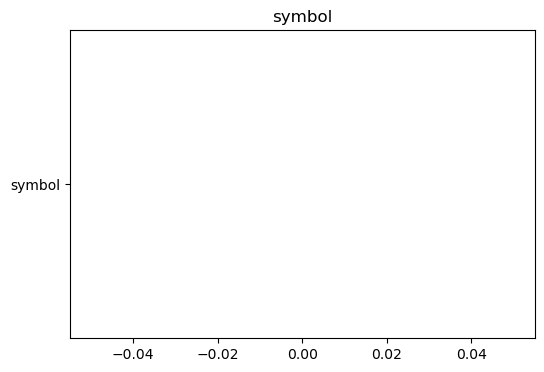

In [28]:
# Box plot to check for outliers

# Convert all columns to numeric data types
Bitcoin_df = Bitcoin_df.apply(pd.to_numeric, errors='coerce')

# Create a box plot for each column in the DataFrame
for col in Bitcoin_df.columns:
    plt.figure()  # Create a new figure for each column
    Bitcoin_df[col].plot(kind='box', vert=False, figsize=(6, 4))
    plt.title(col)  # Add the column name as the title
    plt.show()

# Bivariate Analysis

In [44]:
# Correlation analysis

correlation_matrix = crypto_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999119  0.998085  0.996805  0.653290
High    0.999119  1.000000  0.998448  0.998326  0.662746
Low     0.998085  0.998448  1.000000  0.999071  0.640371
Close   0.996805  0.998326  0.999071  1.000000  0.649411
Volume  0.653290  0.662746  0.640371  0.649411  1.000000


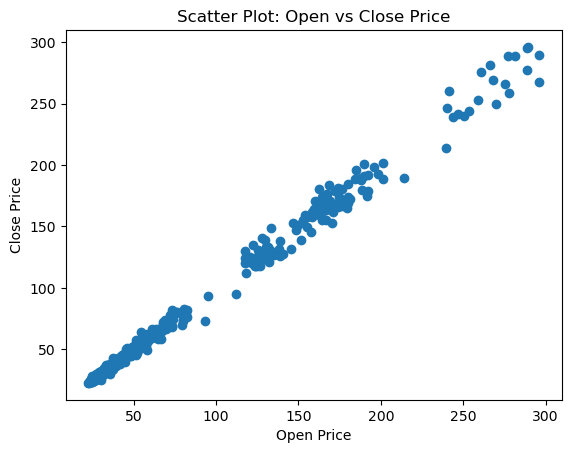

In [46]:
# Scatter Plot of all coin

plt.scatter(crypto_df['Open'], crypto_df['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Scatter Plot: Open vs Close Price')
plt.show()

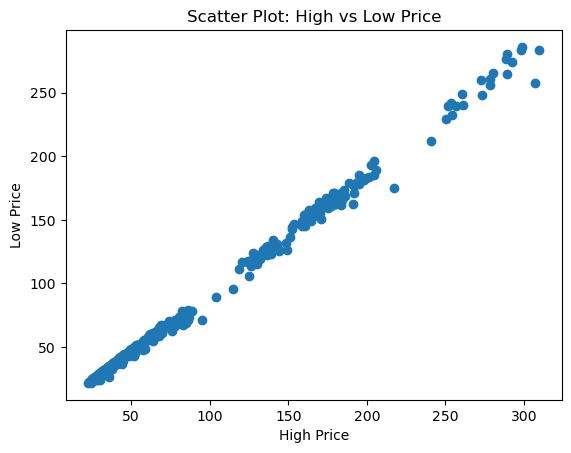

In [47]:
# Scatter Plot of high and low price of all coin

plt.scatter(crypto_df['High'], crypto_df['Low'])
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.title('Scatter Plot: High vs Low Price')
plt.show()

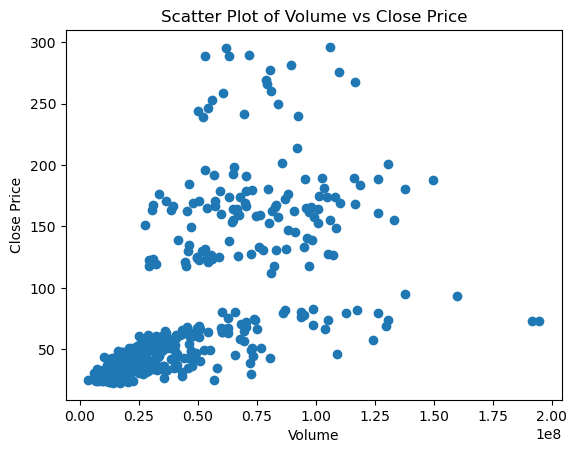

In [50]:
# Scatter Plot of Volume vs Close Price of all coins

plt.scatter(crypto_df['Volume'], crypto_df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Volume vs Close Price')
plt.show()

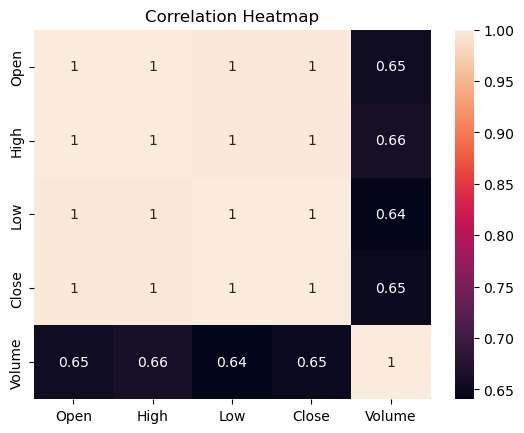

In [52]:
# Heat Map of Open, High, Low and Close of all coins

correlation_matrix = crypto_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

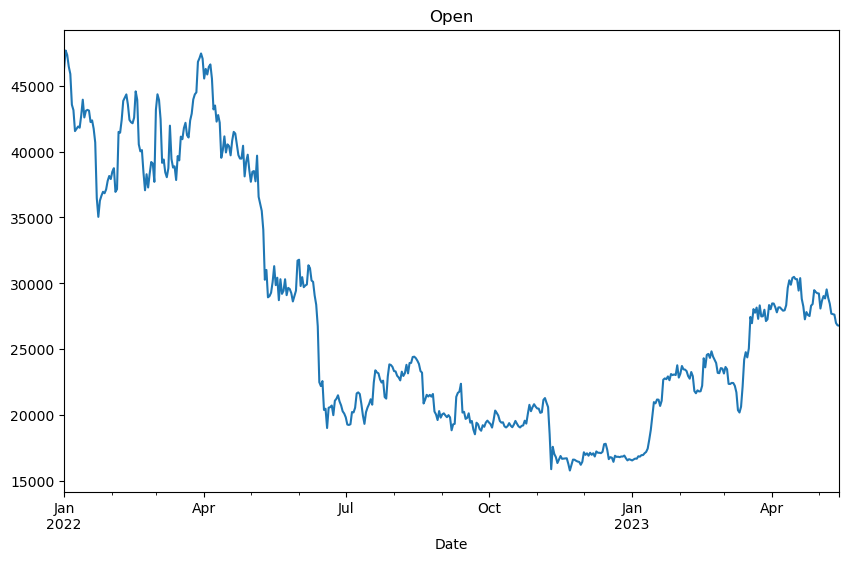

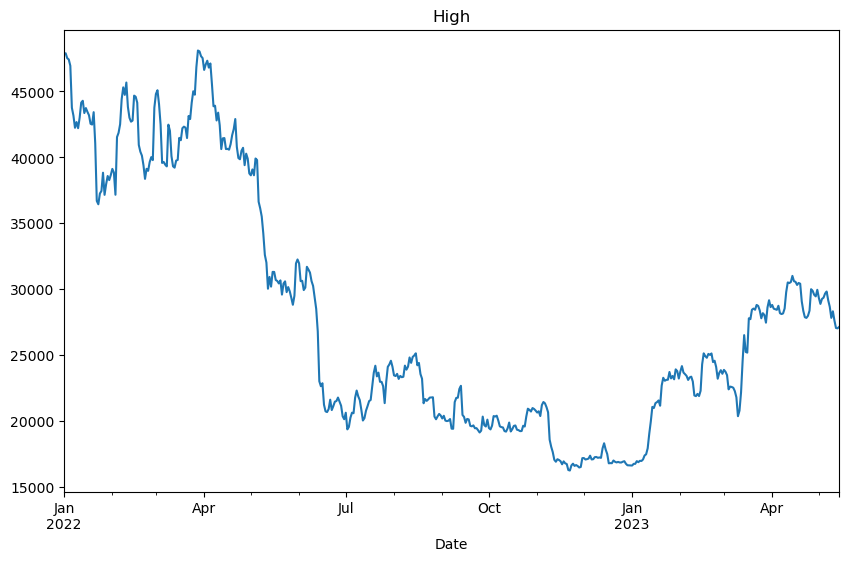

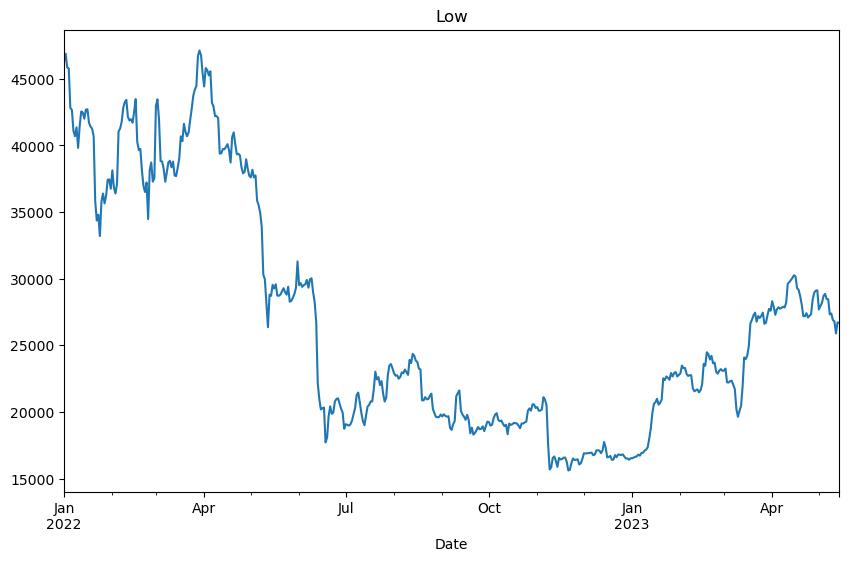

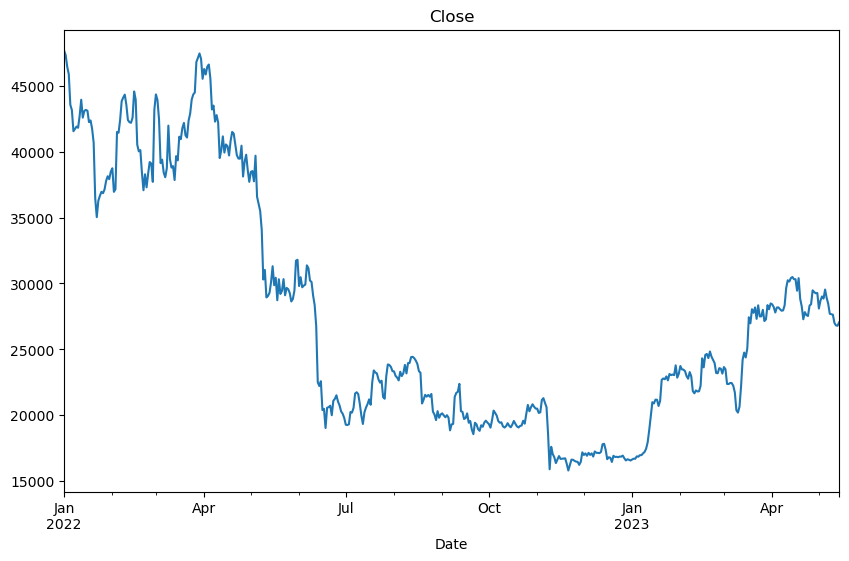

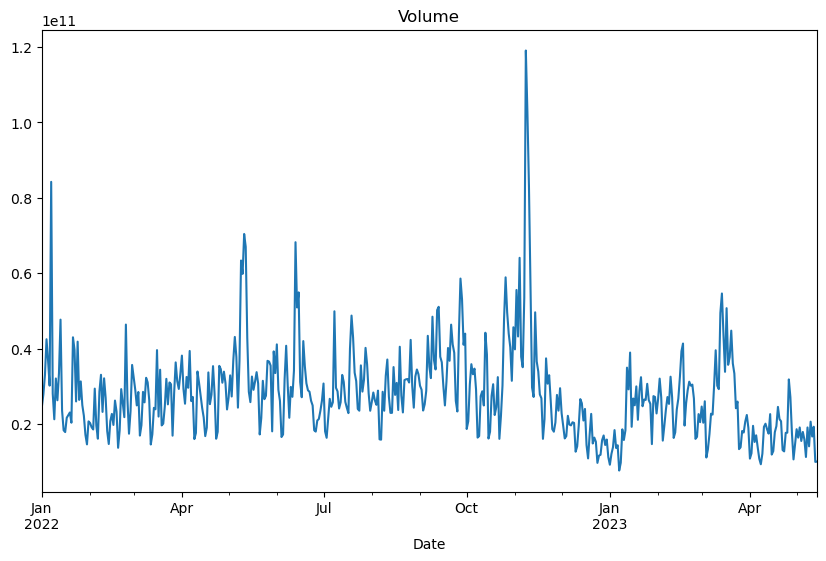

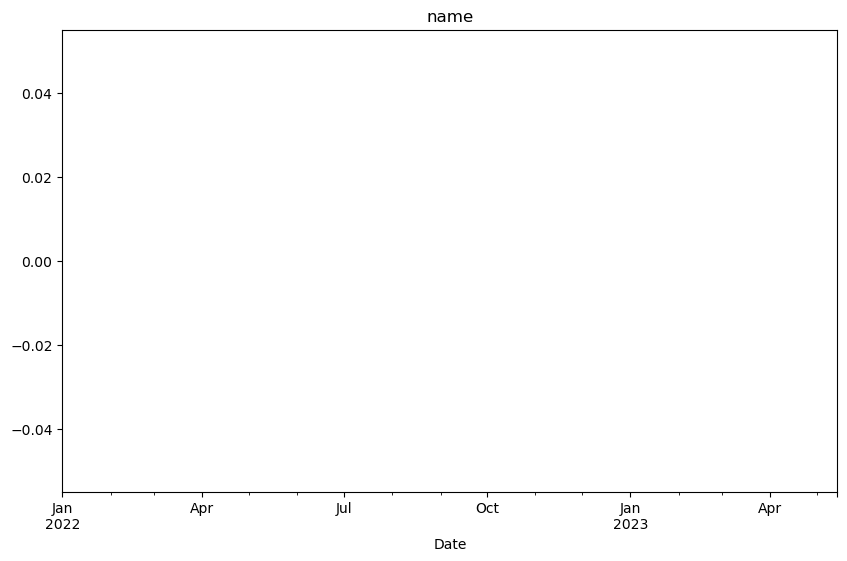

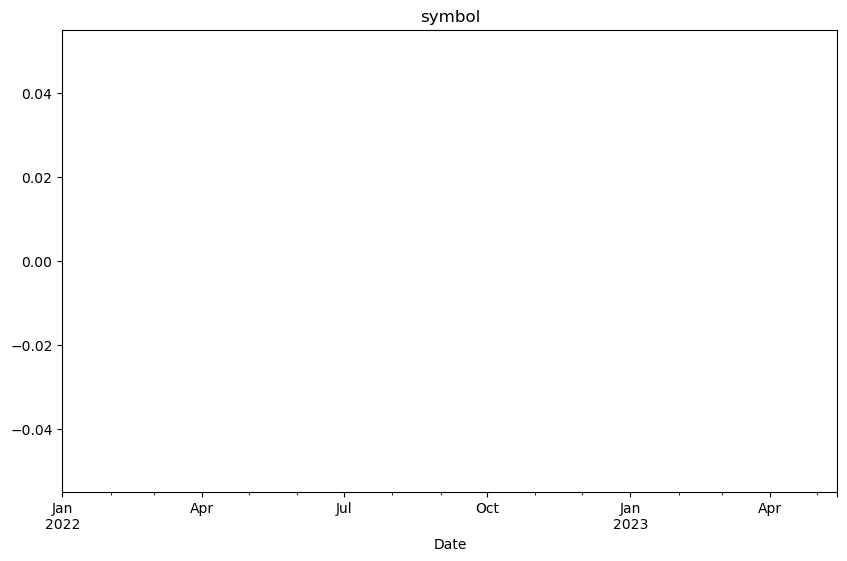

In [41]:
# Time series analysis

# Plot each column separately
for col in Bitcoin_df.columns:
    Bitcoin_df[col].plot(figsize=(10,6))
    plt.title(col)
    plt.show()


# Multivariate Analysis

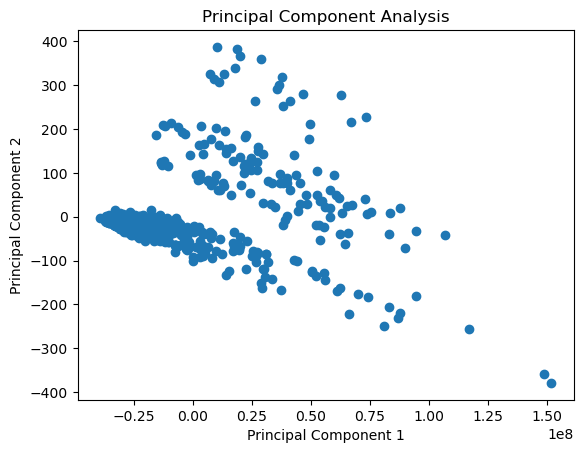

In [66]:
# Principal Component Analysis
from sklearn.decomposition import PCA

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = crypto_df[features]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Plotting the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

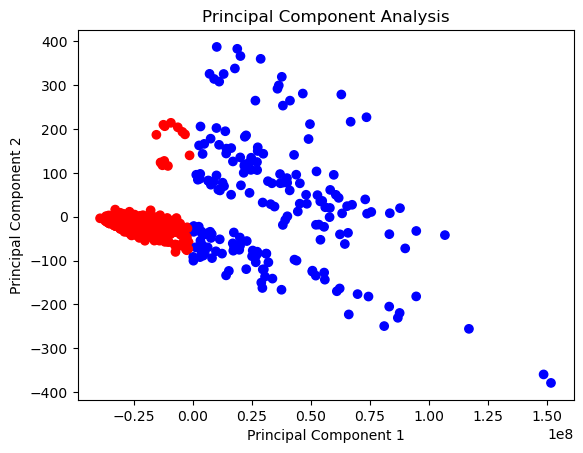

In [68]:
# Principal Component Analysis
from sklearn.decomposition import PCA

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = crypto_df[features]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Generating colors for points based on Volume
colors = np.where(crypto_df['Volume'] >= crypto_df['Volume'].mean(), 'blue', 'red')

# Plotting the principal components with different colors
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

Explained Variance Ratio: [1.00000000e+00 8.54335258e-12]
Principal Components and Feature Weights:
Principal Component 1:
Open: 1.2659489408532075e-06
High: 1.328214784038015e-06
Low: 1.1863972526657058e-06
Close: 1.2466334121566847e-06
Volume: 0.9999999999968358
Principal Component 2:
Open: 0.5012052813419471
High: 0.5132067141121003
Low: 0.4865239679680996
Close: 0.4987048858106867
Volume: -2.5150619124632785e-06


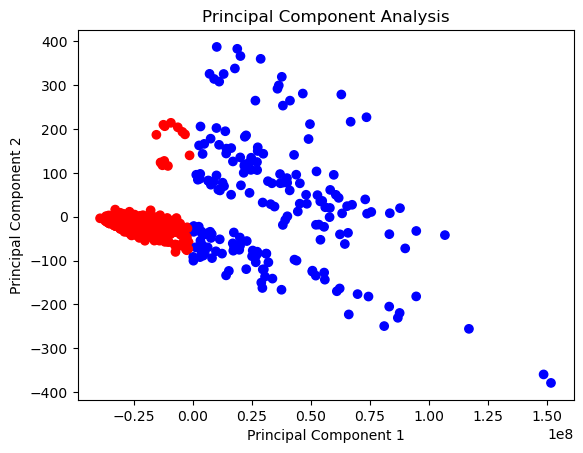

In [70]:
# Contribution to the PCA
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = crypto_df[features]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Examine explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

# Examine PCA components and feature weights
components = pca.components_
print('Principal Components and Feature Weights:')
for i, component in enumerate(components):
    print(f'Principal Component {i+1}:')
    for j, feature in enumerate(features):
        weight = component[j]
        print(f'{feature}: {weight}')

# Generating colors for points based on Volume
colors = np.where(crypto_df['Volume'] >= crypto_df['Volume'].mean(), 'blue', 'red')

# Plotting the principal components with different colors
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

# Feature Importance

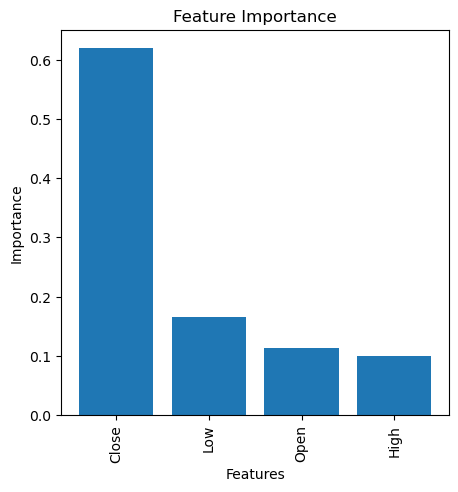

In [79]:
from sklearn.ensemble import RandomForestRegressor

# Extract the features (Open, Close, High, Low) and the target variable (Close)
features = Bitcoin_df[['Open', 'Close', 'High', 'Low']]
target = Bitcoin_df['Close']

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(features, target)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(5, 5))
plt.title("Feature Importance")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

<Axes: xlabel='Date'>

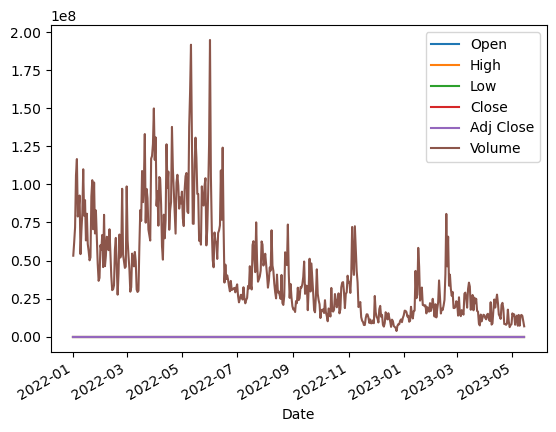

In [80]:
# Data seasonality 
crypto_df.plot()

<Axes: xlabel='Date'>

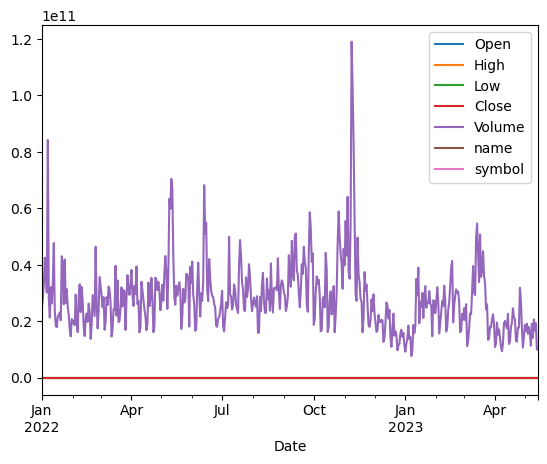

In [81]:
# Data seasonality 
Bitcoin_df.plot()

In [93]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Bitcoin_df['Close'].values.reshape(-1, 1))

# Model Investigation Test 1

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from sklearn.metrics import r2_score
import yfinance as yf
import datetime as dt

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)
bitcoin_data = bitcoin[['Open', 'High', 'Low', 'Close']]

# Split the data into features (X) and target variable (y)
X = bitcoin_data[['Open', 'High', 'Low']]
y = bitcoin_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=100, batch_size=32, verbose=0)
lstm_predictions = lstm_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_r2 = r2_score(y_test, lstm_predictions)

# GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=100, batch_size=32, verbose=0)
gru_predictions = gru_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
gru_r2 = r2_score(y_test, gru_predictions)

# Compare the R-squared scores of the models
r2_scores = {'Random Forest': rf_r2, 'LSTM': lstm_r2, 'GRU': gru_r2}
best_model = max(r2_scores, key=r2_scores.get)
print("R-squared Scores:")
for model, r2 in r2_scores.items():
    print(f"{model}: {r2}")
print(f"\nBest Model: {best_model}")

[*********************100%***********************]  1 of 1 completed
4/4 [==============================] - 0s 3ms/step
R-squared Scores:
Random Forest: 0.9549687435659405
LSTM: 0.9700571838269827
GRU: 0.9815140741865457

Best Model: GRU


# Model Investigation Test 2

In [126]:
# Split the data into features (X) and target variable (y)
X = bitcoin_data[['Open', 'High', 'Low']]
y = bitcoin_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [127]:
# Testing Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)

In [128]:
# Testing LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=100, batch_size=32, verbose=0)
lstm_predictions = lstm_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_r2 = r2_score(y_test, lstm_predictions)

4/4 [==============================] - 0s 3ms/step


In [129]:
# Compare the R-squared scores of the models
r2_scores = {'Random Forest': rf_r2, 'LSTM': lstm_r2}
best_model = max(r2_scores, key=r2_scores.get)
print("R-squared Scores:")
for model, r2 in r2_scores.items():
    print(f"{model}: {r2:.2f}")
print(f"\nBest Model: {best_model}")

R-squared Scores:
Random Forest: 0.95
LSTM: 0.97

Best Model: LSTM


# Cross Validation on Model Investigation Test 2

In [134]:
# Random Forest model
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_r2_mean = rf_scores.mean()

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Perform cross-validation using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lstm_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lstm_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=100, batch_size=32, verbose=0)
    lstm_predictions = lstm_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
    lstm_r2 = r2_score(y_test, lstm_predictions)
    lstm_scores.append(lstm_r2)

lstm_r2_mean = np.mean(lstm_scores)

# Compare the R-squared scores of the models
r2_scores = {'Random Forest': rf_r2_mean, 'LSTM': lstm_r2_mean}
best_model = max(r2_scores, key=r2_scores.get)
print("Mean R-squared Scores (Cross-Validation):")
for model, r2 in r2_scores.items():
    print(f"{model}: {r2:.2f}")
print(f"\nBest Model: {best_model}")

3/3 [==============================] - 0s 3ms/step
Mean R-squared Scores (Cross-Validation):
Random Forest: 0.75
LSTM: 0.95

Best Model: LSTM


# Model Investigation Test 3

In [159]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Calculate the moving averages
bitcoin['10-day MA'] = bitcoin['Close'].rolling(window=10).mean()
bitcoin['20-day MA'] = bitcoin['Close'].rolling(window=20).mean()

# Drop rows with missing values
bitcoin.dropna(inplace=True)

# Define the target variable
bitcoin['Profit/Loss'] = np.where(bitcoin['Close'] > bitcoin['20-day MA'], 1, 0)

# Split the data into train and test sets
train_size = int(0.8 * len(bitcoin))
train_data = bitcoin.iloc[:train_size]
test_data = bitcoin.iloc[train_size:]

# Prepare the train and test datasets
X_train = train_data[['10-day MA', '20-day MA']].values
y_train = train_data['Profit/Loss'].values
X_test = test_data[['10-day MA', '20-day MA']].values
y_test = test_data['Profit/Loss'].values

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(2, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Predict using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Predict using the LSTM model
lstm_predictions = lstm_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = np.where(lstm_predictions > 0.5, 1, 0)

# Calculate accuracy for the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate accuracy for the LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)

# Print the accuracies with two decimal places
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
22/22 [==============================] - 3s 5ms/step - loss: 0.6823
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6813
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6815
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6815
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6814
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6813
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6815
Epoch 10/10
6/6 [==============================] - 1s 3ms/step
Random Forest Accuracy: 0.49
LSTM Accuracy: 0.38


# Hyperparameter Tuning on Model Investigation Test 3

In [166]:
# Hyperparameter tuning

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Calculate the moving averages
bitcoin['10-day MA'] = bitcoin['Close'].rolling(window=10).mean()
bitcoin['20-day MA'] = bitcoin['Close'].rolling(window=20).mean()

# Drop rows with missing values
bitcoin.dropna(inplace=True)

# Define the target variable
bitcoin['Profit/Loss'] = np.where(bitcoin['Close'] > bitcoin['20-day MA'], 1, 0)

# Split the data into train and test sets
train_size = int(0.8 * len(bitcoin))
train_data = bitcoin.iloc[:train_size]
test_data = bitcoin.iloc[train_size:]

# Prepare the train and test datasets
X_train = train_data[['10-day MA', '20-day MA']].values
y_train = train_data['Profit/Loss'].values
X_test = test_data[['10-day MA', '20-day MA']].values
y_test = test_data['Profit/Loss'].values

# Random Forest Classifier
rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
rf_best_model = rf_grid_search.best_estimator_

# LSTM Model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(2, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create KerasClassifier wrapper for GridSearchCV compatibility
lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# Define the parameter grid for hyperparameter tuning
lstm_param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Perform grid search to find the best hyperparameters
lstm_grid_search = GridSearchCV(lstm_model, lstm_param_grid, cv=3)
lstm_grid_search.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train)

# Get the best LSTM model
lstm_best_model = lstm_grid_search.best_estimator_.model

# Predict using the best Random Forest model
rf_predictions = rf_best_model.predict(X_test)

# Predict using the best LSTM model
lstm_predictions = np.where(lstm_predictions > 0.5, 1, 0)

# Calculate accuracy for the best Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate accuracy for the best LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)

# Print the accuracies with two decimal places
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

# Print the best hyperparameters for the Random Forest model
print("Random Forest Best Hyperparameters:")
print(rf_grid_search.best_params_)

# Print the best hyperparameters for the LSTM model
print("LSTM Best Hyperparameters:")
print(lstm_grid_search.best_params_)

[*********************100%***********************]  1 of 1 completed


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_9876\3807247975.py:67: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\HP 840 G3\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 335,

Random Forest Accuracy: 0.47
LSTM Accuracy: 0.38
Random Forest Best Hyperparameters:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
LSTM Best Hyperparameters:
{'batch_size': 32, 'epochs': 10}


# Model Investigation Test 4

In [168]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Calculate the moving averages
bitcoin['10-day MA'] = bitcoin['Close'].rolling(window=10).mean()
bitcoin['20-day MA'] = bitcoin['Close'].rolling(window=20).mean()

# Drop rows with missing values
bitcoin.dropna(inplace=True)

# Define the target variable
bitcoin['Profit/Loss'] = np.where(bitcoin['Close'] > bitcoin['20-day MA'], 1, 0)

# Split the data into train and test sets
train_size = int(0.8 * len(bitcoin))
train_data = bitcoin.iloc[:train_size]
test_data = bitcoin.iloc[train_size:]

# Prepare the train and test datasets
X_train = train_data[['10-day MA', '20-day MA']].values
y_train = train_data['Profit/Loss'].values
X_test = test_data[['10-day MA', '20-day MA']].values
y_test = test_data['Profit/Loss'].values

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(2, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Predict using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Predict using the LSTM model
lstm_predictions = lstm_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = np.where(lstm_predictions > 0.5, 1, 0)

# Calculate accuracy for the Random Forest model
rf_accuracy = accuracy_score(y_test, np.round(rf_predictions))

# Calculate accuracy for the LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)

# Print the accuracies with two decimal places
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
22/22 [==============================] - 3s 5ms/step - loss: 0.6815
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6813
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6812
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6813
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6815
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6812
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6815
Epoch 10/10
6/6 [==============================] - 1s 3ms/step
Random Forest Accuracy: 0.50
LSTM Accuracy: 0.38


# Model Investigation Test 5

In [169]:
# buy or sell signal accuracy check

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Downloading cryptocurrency data from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Calculate the moving averages
bitcoin['10-day MA'] = bitcoin['Close'].rolling(window=10).mean()
bitcoin['20-day MA'] = bitcoin['Close'].rolling(window=20).mean()

# Drop rows with missing values
bitcoin.dropna(inplace=True)

# Define the target variable
bitcoin['Signal'] = np.where(bitcoin['Close'] > bitcoin['20-day MA'], 1, 0)

# Split the data into train and test sets
train_size = int(0.8 * len(bitcoin))
train_data = bitcoin.iloc[:train_size]
test_data = bitcoin.iloc[train_size:]

# Prepare the train and test datasets
X_train = train_data[['10-day MA', '20-day MA']].values
y_train = train_data['Signal'].values
X_test = test_data[['10-day MA', '20-day MA']].values
y_test = test_data['Signal'].values

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(2, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Predict using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Predict using the LSTM model
lstm_predictions = lstm_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = np.where(lstm_predictions > 0.5, 1, 0)

# Calculate accuracy for the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate accuracy for the LSTM model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("LSTM Accuracy:", lstm_accuracy)



[*********************100%***********************]  1 of 1 completed
Epoch 1/10
22/22 [==============================] - 3s 5ms/step - loss: 0.6902
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6826
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6813
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6812
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6816
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6811
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6817
Epoch 10/10
6/6 [==============================] - 1s 4ms/step
Random Forest Accuracy: 0.5
LSTM Accuracy: 0.3764705882352941


# Model Investigation Test 6

In [174]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Data cleaning. Removing the redundant Adj Close column
bitcoin_data = bitcoin.drop(['Adj Close'], axis='columns')

# Calculating the moving average for a given number of days
moving_avg_days = [1, 7, 30, 90]
for days in moving_avg_days:
    bitcoin_data[f'MA_{days}'] = bitcoin_data['Close'].rolling(window=days).mean()

# Calculating the percentage change in price for a given number of days
price_change_days = [1, 7, 30, 90]
for days in price_change_days:
    bitcoin_data[f'Price_Change_{days}'] = bitcoin_data['Close'].pct_change(periods=days)

# Filtering the dataframe for the given time interval
days_interval = 60
bitcoin_data = bitcoin_data.tail(days_interval+90)

# Creating labels for the target variable based on the price change after future days
future_days = 7
bitcoin_data['Target'] = bitcoin_data['Close'].shift(-future_days) >= bitcoin_data['Close']
bitcoin_data.dropna(inplace=True)

# Splitting the data into train and test sets
X = bitcoin_data[['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
y = bitcoin_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the random forest model
model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
model3 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
ensemble = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting='soft')
ensemble.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred_rf = ensemble.predict(X_test)

# Calculating the evaluation metrics for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)


print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_score_rf:.2f}")


# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(8, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)


# LSTM Model
# Predicting the target variable for the test set
y_pred_lstm = lstm_model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = (y_pred_lstm > 0.5)

# Calculating the evaluation metrics for LSTM
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_score_lstm = f1_score(y_test, y_pred_lstm)

print("LSTM Evaluation Metrics:")
print(f"Accuracy: {accuracy_lstm:.2f}")
print(f"Precision: {precision_lstm:.2f}")
print(f"Recall: {recall_lstm:.2f}")
print(f"F1-Score: {f1_score_lstm:.2f}")


# Predicting the target variable for the test set
y_pred_lstm = lstm_model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = (y_pred_lstm > 0.5)

# # Calculating the R-squared score for LSTM
# r2_score_lstm = r2_score(y_test, y_pred_lstm)
# print(f"LSTM R-squared score: {r2_score_lstm}")

# Predictions for future days with dates
predictions = []
dates = []
today = dt.datetime.today().strftime('%Y-%m-%d')
for i in range(future_days):
    date = (dt.datetime.today() + dt.timedelta(days=i + 1)).strftime('%Y-%m-%d')
    dates.append(date)
    ma_1, ma_7, ma_30, ma_90 = bitcoin_data.iloc[-1 - i][['MA_1', 'MA_7', 'MA_30', 'MA_90']]
    pct_change_1, pct_change_7, pct_change_30, pct_change_90 = bitcoin_data.iloc[-1 - i][
        ['Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
    features = [ma_1, ma_7, ma_30, ma_90, pct_change_1, pct_change_7, pct_change_30, pct_change_90]

    prediction = ensemble.predict([features])[0]
    predictions.append(prediction)

# Buy, sell, hold signal for each future with dates
day_predictions = []
for i in range(len(predictions)):
    if predictions[i]:
        day_predictions.append("Buy")
    else:
        day_predictions.append("Sell")

    # Print prediction with date
    if i == len(predictions) - 1:
        print(f"{dates[i]}: {day_predictions[i]}")

# Return the predictions for future days
return day_predictions[-1]


predictions = predict_buy_sell_hold_future("BTC", "USD", 60, 7)
print(predictions)


[*********************100%***********************]  1 of 1 completed
Random Forest Classifier Evaluation Metrics:
Accuracy: 0.90
Precision: 1.00
Recall: 0.82
F1-Score: 0.90
Epoch 1/10
4/4 [==============================] - 4s 19ms/step - loss: 0.7021
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6964
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6956
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6950
Epoch 5/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6935
Epoch 6/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6917
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6924
Epoch 8/10
4/4 [==============================] - 0s 15ms/step - loss: 0.6944
Epoch 9/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6934
Epoch 10/10
1/1 [==============================] - 1s 570ms/step
LSTM Evaluation Metrics:
Accuracy: 0.57
Precision: 0.57
Reca

C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-pa

2023-05-23: Sell


C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP 840 G3\anaconda3\lib\site-pa

SyntaxError: 'return' outside function (2830816876.py, line 132)

# Model Investigation Test 7

In [101]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Data cleaning. Removing the redundant Adj Close column
bitcoin_data = bitcoin.drop(['Adj Close'], axis='columns')

# Calculating the moving average for a given number of days
moving_avg_days = [1, 7, 30, 90]
for days in moving_avg_days:
    bitcoin_data[f'MA_{days}'] = bitcoin_data['Close'].rolling(window=days).mean()

# Calculating the percentage change in price for a given number of days
price_change_days = [1, 7, 30, 90]
for days in price_change_days:
    bitcoin_data[f'Price_Change_{days}'] = bitcoin_data['Close'].pct_change(periods=days)

# Filtering the dataframe for the given time interval
days_interval = 60
bitcoin_data = bitcoin_data.tail(days_interval + 90)

# Creating labels for the target variable based on the price change after future days
future_days = 7
bitcoin_data['Target'] = bitcoin_data['Close'].shift(-future_days) >= bitcoin_data['Close']
bitcoin_data.dropna(inplace=True)

# Splitting the data into train and test sets
X = bitcoin_data[['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
y = bitcoin_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the random forest regressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
regressor.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred_rf = regressor.predict(X_test)
y_pred_rf = (y_pred_rf >= 0.5)

# Calculating the evaluation metrics for Random Forest Regressor
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_score_rf:.2f}")

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(8, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size= 32)

# Predicting the target variable for the test set
y_pred_lstm = lstm_model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = (y_pred_lstm >= 0.5)

# Calculating the evaluation metrics for LSTM
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_score_lstm = f1_score(y_test, y_pred_lstm)

print("LSTM Evaluation Metrics:")
print(f"Accuracy: {accuracy_lstm:.2f}")
print(f"Precision: {precision_lstm:.2f}")
print(f"Recall: {recall_lstm:.2f}")
print(f"F1-Score: {f1_score_lstm:.2f}")

# Comparing the performance of Random Forest Regressor and LSTM
print("Comparison of Random Forest Regressor and LSTM:")
print("Random Forest Regressor:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_score_rf:.2f}")
print()
print("LSTM:")
print(f"Accuracy: {accuracy_lstm:.2f}")
print(f"Precision: {precision_lstm:.2f}")
print(f"Recall: {recall_lstm:.2f}")
print(f"F1-Score: {f1_score_lstm:.2f}")




[*********************100%***********************]  1 of 1 completed


NameError: name 'precision_score' is not defined

# Model Investigation Test 8

In [55]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Data cleaning. Removing the redundant Adj Close column
bitcoin_data = bitcoin.drop(['Adj Close'], axis='columns')

# Calculating the moving average for a given number of days
moving_avg_days = [1, 7, 30, 90]
for days in moving_avg_days:
    bitcoin_data[f'MA_{days}'] = bitcoin_data['Close'].rolling(window=days).mean()

# Calculating the percentage change in price for a given number of days
price_change_days = [1, 7, 30, 90]
for days in price_change_days:
    bitcoin_data[f'Price_Change_{days}'] = bitcoin_data['Close'].pct_change(periods=days)

# Filtering the dataframe for the given time interval
days_interval = 60
bitcoin_data = bitcoin_data.tail(days_interval + 90)

# Creating labels for the target variable based on the price change after future days
future_days = 7
bitcoin_data['Target'] = bitcoin_data['Close'].shift(-future_days) >= bitcoin_data['Close']
bitcoin_data.dropna(inplace=True)

# Splitting the data into train and test sets
X = bitcoin_data[['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
y = bitcoin_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the random forest classifier
regressor = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
regressor.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred_rf = regressor.predict(X_test)
y_pred_rf = (y_pred_rf >= 0.5)

# Calculating the ROC AUC score for Random Forest Classifier
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"ROC AUC Score for Random Forest Classifier: {roc_auc_rf:.2f}")

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(8, 1)))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam')
lstm_model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32)

# Predicting the target variable for the test set
y_pred_lstm = lstm_model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = (y_pred_lstm >= 0.5)

# Calculating the ROC AUC score for LSTM
roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm)
print(f"ROC AUC Score for LSTM: {roc_auc_lstm:.2f}")

# Comparing the performance of Random Forest Regressor and LSTM

print("Comparison of Random Forest Classifier and LSTM:")
print("Random Forest Classifier:")
print(f"ROC AUC Score: {roc_auc_rf:.2f}")
print()
print("LSTM:")
print(f"ROC AUC Score: {roc_auc_lstm:.2f}")


[*********************100%***********************]  1 of 1 completed
ROC AUC Score for Random Forest Classifier: 0.90
Epoch 1/10
4/4 [==============================] - 4s 12ms/step - loss: 0.6936
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6935
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6915
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6916
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6915
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6928
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6912
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6917
Epoch 9/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6915
Epoch 10/10
1/1 [==============================] - 1s 628ms/step
ROC AUC Score for LSTM: 0.50
Comparison of Random Forest Classifier and LSTM:
Random Forest Classifier:
ROC AUC Score

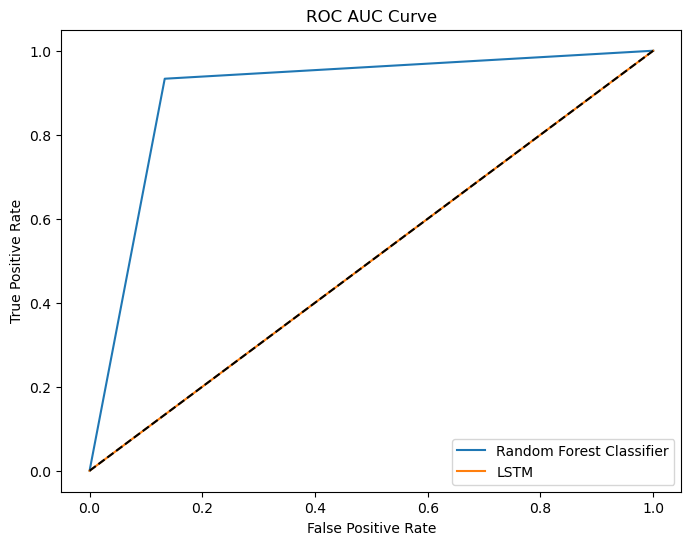

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Random Forest Classifier ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# LSTM ROC curve
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)

# Plotting the ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifier')
plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


# Model Investigation Test 8

In [69]:
# Comparing Model for Profit and Loss
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extracting real-time data for Bitcoin from Yahoo Finance
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()
bitcoin = yf.download([f'{crypto_currency}-{against_currency}'], start=start, end=end)

# Preprocess the data
X = bitcoin[['Open', 'High']].values
y = bitcoin['Close'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

# Make predictions using Random Forest Regressor
rf_predictions = rf_regressor.predict(X_test)

# Calculate R-squared for Random Forest Regressor
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Regressor R-squared: {rf_r2:.2f}")

# Train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32)

# Make predictions using LSTM model
lstm_predictions = lstm_model.predict(np.expand_dims(X_test, axis=2))

# Calculate R-squared for LSTM model
lstm_r2 = r2_score(y_test, lstm_predictions)
print(f"LSTM Model R-squared: {lstm_r2:.2f}")
print()
# Calculate R-squared for Random Forest Regressor
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Regressor R-squared: {rf_r2:.2f}")

[*********************100%***********************]  1 of 1 completed
Random Forest Regressor R-squared: 0.99
Epoch 1/10
22/22 [==============================] - 5s 6ms/step - loss: 1481631488.0000
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 1481611776.0000
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 1481592064.0000
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 1481572352.0000
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 1481552640.0000
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 1481532672.0000
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 1481513088.0000
Epoch 8/10
22/22 [==============================] - 0s 6ms/step - loss: 1481493248.0000
Epoch 9/10
22/22 [==============================] - 0s 6ms/step - loss: 1481473536.0000
Epoch 10/10
6/6 [==============================] - 1s 4ms/step
LSTM Model R-squared: -6.80

Random 

# Project Implementation

### Note: STREAMLIT DASHBOARD has been built on Pycharm and is attached and submitted seperately from this

In [1]:
# Module Importation

import numpy as np
import pandas as pd
import streamlit as st
import yfinance as yf
import datetime as dt
import pytz
from PIL import Image
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:

image = Image.open('Soligence logo.jpg')

st.image(image, caption=None, width=200, use_column_width=150)


# Map the 30 coin names to their ticker symbols
coin_map = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Ripple": "XRP-USD",
    "Tether": "USDT-USD",
    "Solana": "SOL-USD",
    "Cardano": "ADA-USD",
    "Polkadot": "DOT-USD",
    "XRP": "XRP-USD",
    "Dogecoin": "DOGE-USD",
    "Avalanche": "AVAX-USD",
    "USD Coin": "USDC-USD",
    "Cosmos": "ATOM-USD",
    "Algorand": "ALGO-USD",
    "Shiba Inu": "SHIB-USD",
    "Bitcoin Cash": "BCH-USD",
    "Cronos": "CRO-USD",
    "Litecoin": "LTC-USD",
    "FTX Token": "FTT-USD",
    "SushiSwap": "SUSHI-USD",
    "Filecoin": "FIL-USD",
    "VeChain": "VET-USD",
    "Dai": "DAI-USD",
    "BitTorrent": "BTTOLD-USD",
    "Ren": "REN-USD",
    "Zcash": "ZEC-USD",
    "NEM" : "XEM-USD",
    "Theta Network": "THETA-USD",
    "Waves" : "WAVES-USD",
    "Serum" : "SRM-USD",
    "Kusama" : "KSM-USD",
    "Maker" : "MKR-USD",
    "Harmony": "ONE-USD",
    "PancakeSwap": "CAKE-USD",

}


2023-05-17 13:13:49.893 
  command:

    streamlit run C:\Users\HP 840 G3\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [3]:
# Extracting real-time data for the selected coin from Yahoo Finance
coin = st.sidebar.selectbox("Select Coin", ("Bitcoin", "Ethereum", "Ripple","Tether","Solana", "Cardano","Polkadot",
                                            "XRP","Dogecoin","Avalanche","USD Coin","Cosmos","Algorand","Shiba Inu",
                                            "Bitcoin Cash","Cronos","Litecoin","FTX Token","SushiSwap", "Filecoin",
                                            "VeChain", "Dai", "BitTorrent","Ren","Zcash","NEM","Theta Network","Maker",
                                            "Harmony","PancakeSwap", "Waves","Serum","Kusama"))


ticker = coin_map[coin]
if ticker is None:
    st.error("Selected coin is currently not available. Please select another coin.")
else:
    try:
        start = dt.datetime(2021, 1, 1)
        end = dt.datetime.now()
        df = yf.download(ticker, start=start, end=end)
    except Exception as e:
            st.error(f"Try later as an error occurred while trying to download data for {coin}: {e}")


[*********************100%***********************]  1 of 1 completed


In [4]:
# Display the selected coin name next to the subheader
st.subheader(f"Soligence IST Dashboard - {coin}")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [5]:
# Real time Open, High, Low, Close, Adj Close and Volume Dataframe Dashboard

# Setting the timezone of the index to UTC
df.index = df.index.tz_localize(pytz.utc)

# Displaying the data in a table format
st.dataframe(df.iloc[-7:][::-1])

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

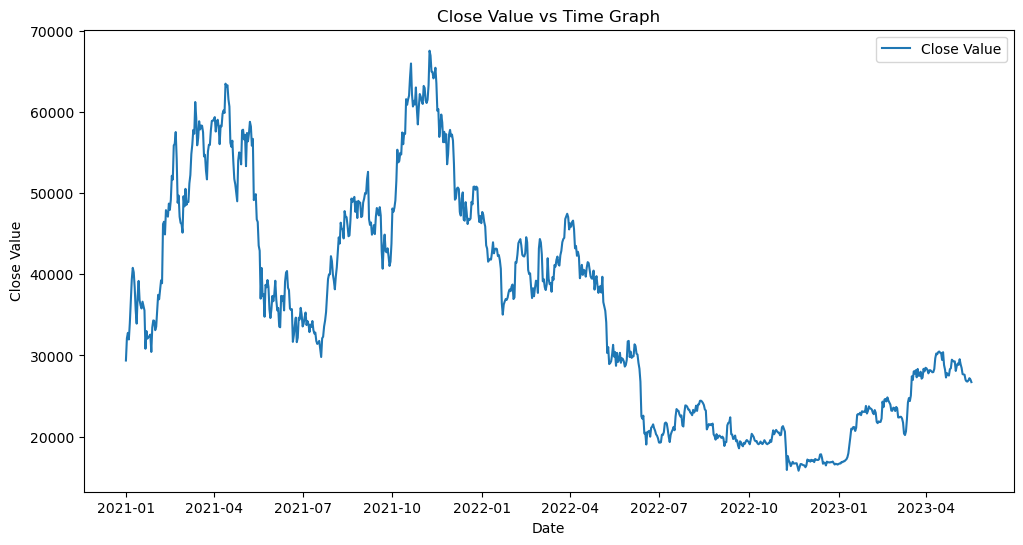

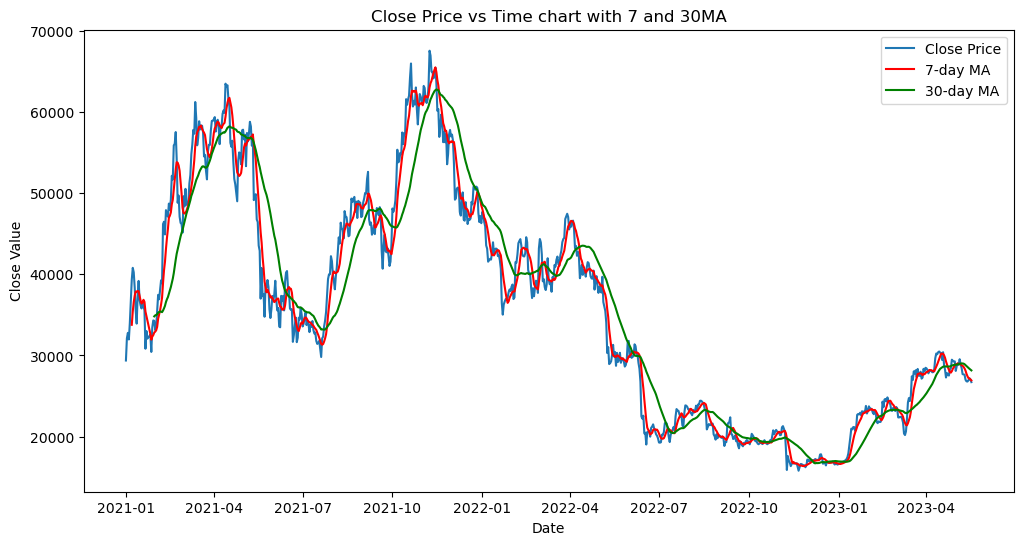

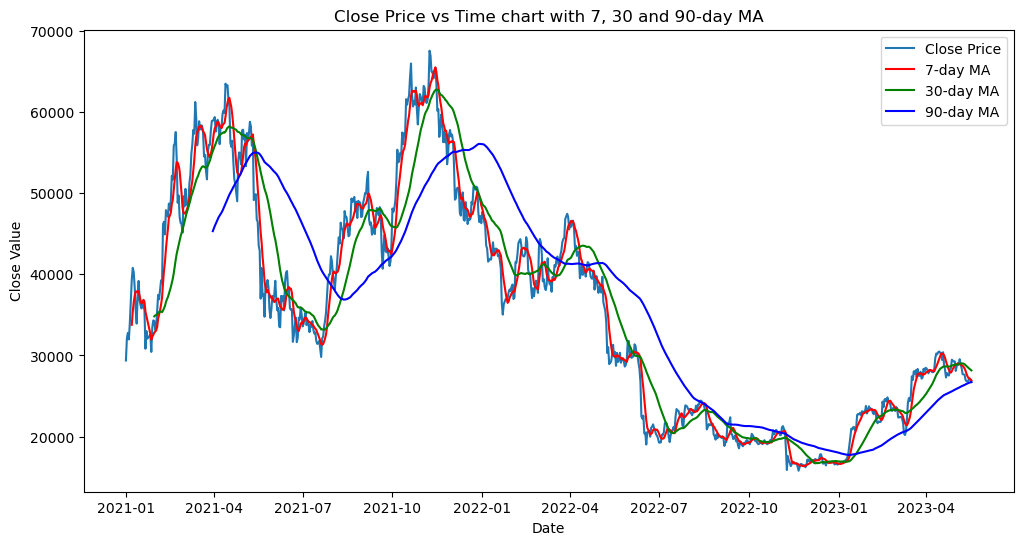

In [14]:
# Close Vs Time Chart and Moving Averages

# Create function to display sidebar widget

def display_sidebar_widgets(df):
    try:
        # Close Price Vs Time Chart         
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(df.Close, label='Close Value')
        ax.set_xlabel("Date")
        ax.set_ylabel("Close Value")
        ax.set_title("Close Value vs Time Graph")
        ax.legend(loc='best')
        st.pyplot(fig)
        plt.show()
        

        # Calculate and plot 7 and 30 days moving average
        ma7 = df['Close'].rolling(7).mean()
        ma30 = df['Close'].rolling(30).mean()
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(df.Close, label='Close Price')
        ax.plot(ma7, 'r', label='7-day MA')
        ax.plot(ma30, 'g', label='30-day MA')
        ax.set_xlabel("Date")
        ax.set_ylabel("Close Value")
        ax.set_title("Close Price vs Time chart with 7 and 30MA")
        ax.legend()
        st.pyplot(fig)
        plt.show()

        # Calculate and plot 7, 30 and 90 days moving average
        ma7 = df['Close'].rolling(7).mean()
        ma30 = df['Close'].rolling(30).mean()
        ma90 = df['Close'].rolling(90).mean()
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(df.Close, label='Close Price')
        ax.plot(ma7, 'r', label='7-day MA')
        ax.plot(ma30, 'g', label='30-day MA')
        ax.plot(ma90, 'b', label='90-day MA')
        ax.set_xlabel("Date")
        ax.set_ylabel("Close Value")
        ax.set_title("Close Price vs Time chart with 7, 30 and 90-day MA")
        ax.legend()
        plt.show()
        st.pyplot(fig)
        
    except Exception as e:
        st.error("An error occurred while displaying the charts. Error message: {}".format(str(e)))


display_sidebar_widgets(df)



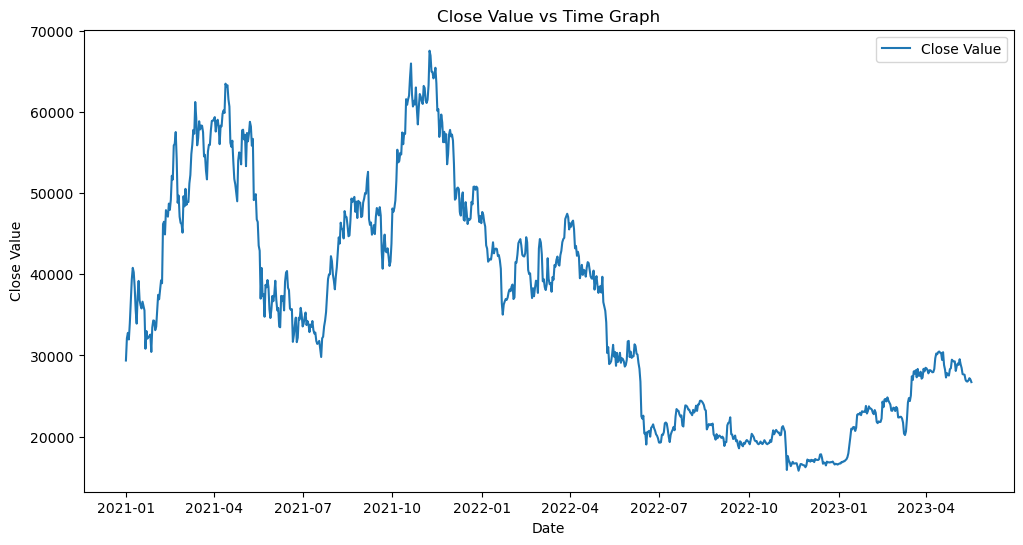

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Close, label='Close Value')
ax.set_xlabel("Date")
ax.set_ylabel("Close Value")
ax.set_title("Close Value vs Time Graph")
ax.legend(loc='best')
# st.pyplot(fig)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
16/16 [==============================] - 3s 47ms/step


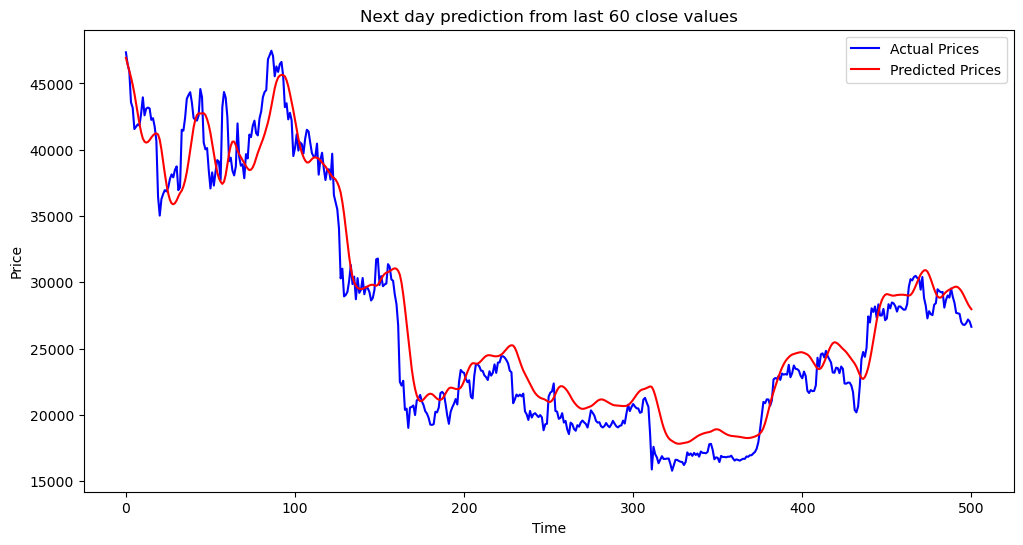

1/1 [==============================] - 3s 3s/step
Next day's predicted price using LSTM: 27834.90
R-squared Score: 0.94
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
16/16 [==============================] - 4s 48ms/step


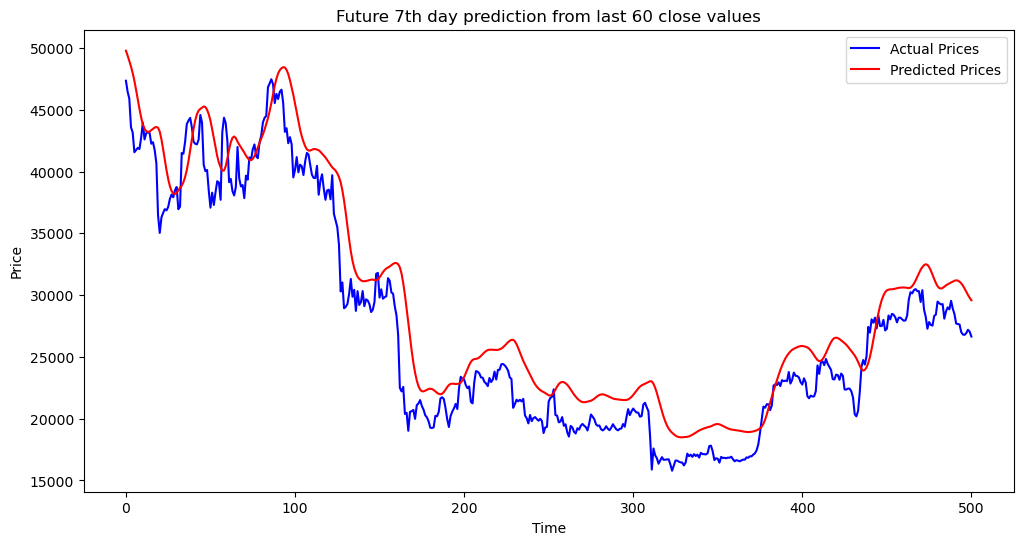

1/1 [==============================] - 3s 3s/step
Future 7th day predicted price using LSTM: 29420.23
R-squared Score: 0.89


In [21]:
# Predicting the next day close value using the last 60 days data & chart display

try:
    # Training the data
    start = dt.datetime(2021, 1, 1)
    end = dt.datetime(2022, 1, 1)
    df = yf.download(ticker, start=start, end=end)

    # Prepare data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

    prediction_days = 60

    future_day = 1

    x_train, y_train = [], []

    for x in range(prediction_days, len(scaled_data) - future_day):
        x_train.append(scaled_data[x - prediction_days:x, 0])
        y_train.append(scaled_data[x + future_day, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Load my model
    model = load_model('keras5n_model.h5')

    # Testing the model

    test_start = dt.datetime(2022, 1, 2)
    test_end = dt.datetime.now()

    test_data = yf.download(ticker, start=test_start, end=test_end)
    actual_prices = test_data['Close'].values


    total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.fit_transform(model_inputs)

    x_test = []
    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x - prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    fig = plt.figure(figsize=(12, 6))
    plt.title("Next day prediction from last 60 close values")
    plt.plot(actual_prices, color='blue', label='Actual Prices')
    plt.plot(prediction_prices, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()
    st.pyplot(fig)

    # Predict next day's price and accuracy score
    real_data = [model_inputs[len(model_inputs) + 1 - prediction_days: len(model_inputs) + 1, 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)

    actual_price = df['Close'][-1]
    predicted_price = prediction[0][0]

    accuracy_score = r2_score(actual_prices, prediction_prices)

    # Display predicted price and accuracy score
    st.write(f"Next day's predicted price using LSTM: {predicted_price:.2f}")
    print(f"Next day's predicted price using LSTM: {predicted_price:.2f}")
    st.write(f"R-squared Score: {accuracy_score:.2f}")
    print(f"R-squared Score: {accuracy_score:.2f}")
except Exception as e:
    st.error("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))
    print("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))


# Predicting the future 7th day close value using the last 60 days data
try:
    # Training the data
    start = dt.datetime(2021, 1, 1)
    end = dt.datetime(2022, 1, 1)
    df = yf.download(ticker, start=start, end=end)

    # Prepare data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

    prediction_days = 60

    future_day = 7

    x_train, y_train = [], []

    for x in range(prediction_days, len(scaled_data) - future_day):
        x_train.append(scaled_data[x - prediction_days:x, 0])
        y_train.append(scaled_data[x + future_day, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Load my model
    # model = load_model('keras2_model.h5')
    model = load_model('keras6n_model.h5')


    # Testing the model

    test_start = dt.datetime(2022, 1, 2)
    test_end = dt.datetime.now()

    test_data = yf.download(ticker, start=test_start, end=test_end)
    actual_prices = test_data['Close'].values

    total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.fit_transform(model_inputs)

    x_test = []
    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x - prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    fig = plt.figure(figsize=(12, 6))
    plt.title("Future 7th day prediction from last 60 close values")
    plt.plot(actual_prices, color='blue', label='Actual Prices')
    plt.plot(prediction_prices, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()
    st.pyplot(fig)

    # Predict future 7th day's price and accuracy score
    real_data = [model_inputs[len(model_inputs) + 7 - prediction_days: len(model_inputs) + 7, 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)

    actual_price = df['Close'][-1]
    predicted_price = prediction[0][0]

    accuracy_score = r2_score(actual_prices, prediction_prices)

    # Display predicted price and accuracy score
    st.write(f"Future 7th day predicted price using LSTM: {predicted_price:.2f}")
    print(f"Future 7th day predicted price using LSTM: {predicted_price:.2f}")
    st.write(f"R-squared Score: {accuracy_score:.2f}")
    print(f"R-squared Score: {accuracy_score:.2f}")
except Exception as e:
    st.error("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))

    print(f"Future 7th day predicted price using LSTM: {predicted_price:.2f}")
    print(f"R-squared Score: {accuracy_score:.2f}")
except Exception as e:
    print("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
16/16 [==============================] - 3s 46ms/step


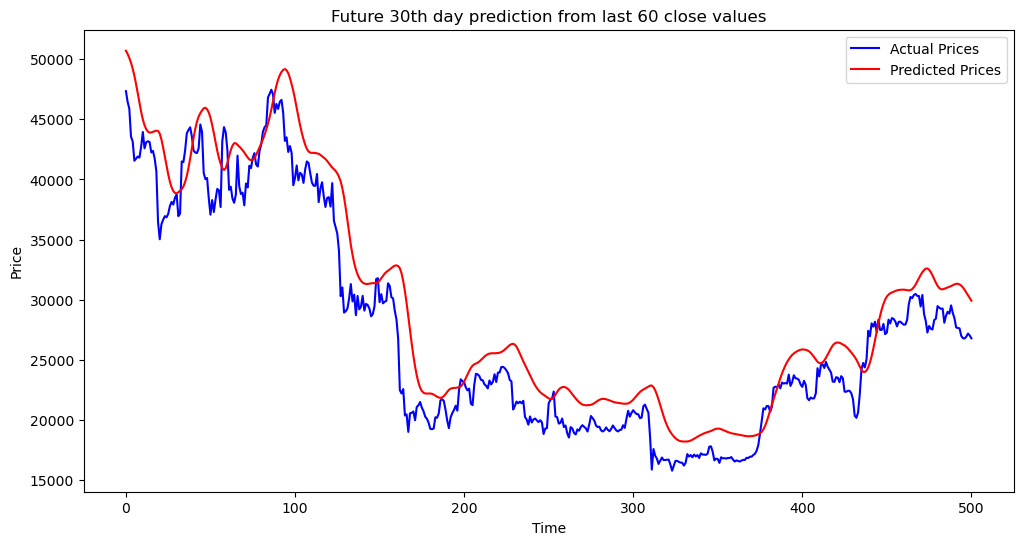

1/1 [==============================] - 3s 3s/step
Future 30th day predicted price using LSTM: 29655.64
R-squared Score: 0.87
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
16/16 [==============================] - 4s 75ms/step


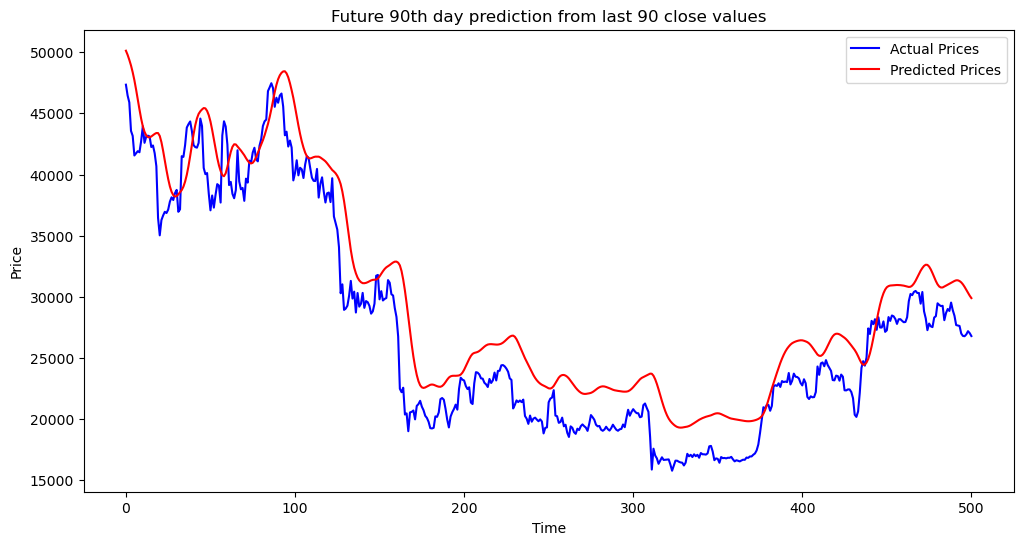

1/1 [==============================] - 3s 3s/step
Future 90th day predicted price using LSTM: 28866.52
R-squared Score: 0.86


In [26]:

# Predicting the 30th day using the last 60 days data

try:
    # Training the data
    start = dt.datetime(2021, 1, 1)
    end = dt.datetime(2022, 1, 1)
    df = yf.download(ticker, start=start, end=end)

    # Prepare data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

    prediction_days = 60

    future_day = 30

    x_train, y_train = [], []

    for x in range(prediction_days, len(scaled_data) - future_day):
        x_train.append(scaled_data[x - prediction_days:x, 0])
        y_train.append(scaled_data[x + future_day, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Load my model
    # model = load_model('keras3_model.h5')
    model = load_model('keras7n_model.h5')

    # Testing the model

    test_start = dt.datetime(2022, 1, 2)
    test_end = dt.datetime.now()

    test_data = yf.download(ticker, start=test_start, end=test_end)
    actual_prices = test_data['Close'].values

    total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.fit_transform(model_inputs)

    x_test = []
    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x - prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    fig = plt.figure(figsize=(12, 6))
    plt.title("Future 30th day prediction from last 60 close values")
    plt.plot(actual_prices, color='blue', label='Actual Prices')
    plt.plot(prediction_prices, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()
    st.pyplot(fig)

    # Predict future 30th day's price and accuracy score
    real_data = [model_inputs[len(model_inputs) + 30 - prediction_days: len(model_inputs) + 30, 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)

    actual_price = df['Close'][-1]
    predicted_price = prediction[0][0]

    accuracy_score = r2_score(actual_prices, prediction_prices)

    # Display predicted price and accuracy score
    st.write(f"Future 30th day predicted price using LSTM: {predicted_price:.2f}")
    print(f"Future 30th day predicted price using LSTM: {predicted_price:.2f}")
    st.write(f"R-squared Score: {accuracy_score:.2f}")
    print(f"R-squared Score: {accuracy_score:.2f}")
except Exception as e:
    st.error("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))
    print("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))

# Predicting the 90th day using the last 60 days data

try:
    # Train data
    start = dt.datetime(2021, 1, 1)
    end = dt.datetime(2022, 1, 1)
    df = yf.download(ticker, start=start, end=end)

    # Prepare the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

    prediction_days = 100

    future_day = 90

    x_train, y_train = [], []

    for x in range(prediction_days, len(scaled_data) - future_day):
        x_train.append(scaled_data[x - prediction_days:x, 0])
        y_train.append(scaled_data[x + future_day, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Load my model
    # model = load_model('keras4_model.h5')
    model = load_model('keras8n_model.h5')

    # Test data

    test_start = dt.datetime(2022, 1, 2)
    test_end = dt.datetime.now()

    test_data = yf.download(ticker, start=test_start, end=test_end)
    actual_prices = test_data['Close'].values

    total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

    model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
    model_inputs = model_inputs.reshape(-1, 1)
    model_inputs = scaler.fit_transform(model_inputs)

    x_test = []
    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x - prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    prediction_prices = model.predict(x_test)
    prediction_prices = scaler.inverse_transform(prediction_prices)

    fig = plt.figure(figsize=(12, 6))
    plt.title("Future 90th day prediction from last 90 close values")
    plt.plot(actual_prices, color='blue', label='Actual Prices')
    plt.plot(prediction_prices, color='red', label='Predicted Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()
    st.pyplot(fig)

    # Predict future 90th day's price and accuracy score
    real_data = [model_inputs[len(model_inputs) + 90 - prediction_days: len(model_inputs) + 90, 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)

    actual_price = df['Close'][-1]
    predicted_price = prediction[0][0]

    accuracy_score = r2_score(actual_prices, prediction_prices)

    # Display predicted price and accuracy score
    st.write(f"Future 90th day predicted price using LSTM: {predicted_price:.2f}")
    print(f"Future 90th day predicted price using LSTM: {predicted_price:.2f}")
    st.write(f"R-squared Score: {accuracy_score:.2f}")
    print(f"R-squared Score: {accuracy_score:.2f}")
except Exception as e:
    st.error("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))
    print("Try later as an error occurred displaying the results. Error message: {}".format(str(e)))



In [36]:
#Next day buy or sell prediction

def predict_buy_sell_hold_future(ticker, days_interval, future_days):
    try:
        # Extracting real time data for the cryptocurrency from yahoo finance
        st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                    "<p style='color:red;'>"
                    "<strong>Next day Decision Prediction</strong>"
                    "</p>"
                    "</div>", unsafe_allow_html=True)

        # st.write("<p style='color:red;'>**Next day Decision Prediction**</p>", unsafe_allow_html=True)
        try:

            ticker = coin_map[coin]

            start = dt.datetime(2022, 1, 1)
            end = dt.datetime.now()
            df = yf.download(ticker, start=start, end=end)

        except ValueError as e:
            st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
            print(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
            return

        # Data cleaning. Removing the redundant Adj Close column
        df = df.drop(['Adj Close'], axis='columns')

        # Calculating the moving average for a given number of days
        moving_avg_days = [1, 7, 30, 90]
        for days in moving_avg_days:
            df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

        # Calculating the percentage change in price for a given number of days
        price_change_days = [1, 7, 30, 90]
        for days in price_change_days:
            df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

        # Filtering the dataframe for the given time interval
        df = df.tail(days_interval + 7)

        # Creating labels for the target variable based on the price change after future days
        df['Target'] = df['Close'].shift(-future_days) >= df['Close']
        df.dropna(inplace=True)

        # Splitting the data into train and test sets
        X = df[
            ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
             'Price_Change_90']]
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        # Training the random forest model
        model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
        model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
        model3 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
        ensemble = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
                                    voting='soft')

        ensemble.fit(X_train, y_train)

        # Predicting the target variable for the test set
        y_pred = ensemble.predict(X_test)


        # Evaluating the accuracy of the model
        model_accuracy = accuracy_score(y_test, y_pred)

        st.write(f"Random Forest Ensemble Model Accuracy: {model_accuracy:.2f}")
        print(f"Random Forest Ensemble Model Accuracy: {model_accuracy:.2f}")

        # Predictions for future days with dates
        predictions = []
        dates = []
        today = dt.datetime.today().strftime('%Y-%m-%d')
        try:
            for i in range(future_days):
                date = (dt.datetime.today() + dt.timedelta(days=i + 1)).strftime('%Y-%m-%d')
                dates.append(date)
                ma_1, ma_7, ma_30, ma_90 = df.iloc[-1 - i][['MA_1', 'MA_7', 'MA_30', 'MA_90']]
                pct_change_1, pct_change_7, pct_change_30, pct_change_90 = df.iloc[-1 - i][
                    ['Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
                features = [ma_1, ma_7, ma_30, ma_90, pct_change_1, pct_change_7, pct_change_30, pct_change_90]

                prediction = ensemble.predict([features])[0]
                predictions.append(prediction)

                # Buy, sell, hold signal for each future with dates
                if prediction:
                    signal = "Buy"
                else:
                    signal = "Sell"
                print(f"{date}: {signal}")
        except Exception as e:
            st.write(f"Error occurred while predicting future values: {e}")
            print(f"Error occurred while predicting future values: {e}")
            return []

        # Return the predictions for future days
        return predictions
    except ValueError:
        print("ValueError: No decision for now. Please check back later.")
        st.write("ValueError: No decision for now. Please check back later.")
    except Exception as e:
        print(f"Error: {e}")
        st.write(f"Error: {e}")


prediction = predict_buy_sell_hold_future(ticker, days_interval=7,
                                               future_days=1)
# if predictions[0]:
if predictions is not None and predictions[0]:
    signal = "Buy"
else:
    signal = "Sell"
st.write(f"Prediction Decision for the Next day: {signal}")
print(f"Prediction Decision for the Next day: {signal}")


[*********************100%***********************]  1 of 1 completed
Error: 'numpy.float64' object is not callable
Prediction Decision for the Next day: Sell


In [40]:
# Next week buy or sell prediction
def predict_buy_sell_hold_future(ticker, days_interval, future_days):
    try:
        # Extracting real time data for the cryptocurrency from yahoo finance
        st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                    "<p style='color:red;'>"
                    "<strong>Future 7th day Decision Prediction</strong>"
                    "</p>"
                    "</div>", unsafe_allow_html=True)

        # st.write("<p style='color:red;'>**Future 7th day Decision Prediction**</p>", unsafe_allow_html=True)
        try:

            ticker = coin_map[coin]

            start = dt.datetime(2022, 1, 1)
            end = dt.datetime.now()
            df = yf.download(ticker, start=start, end=end)

        except ValueError as e:
            st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
            return

        # Data cleaning. Removing the redundant Adj Close column
        df = df.drop(['Adj Close'], axis='columns')

        # Calculating the moving average for a given number of days
        moving_avg_days = [1, 7, 30, 90]
        for days in moving_avg_days:
            df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

        # Calculating the percentage change in price for a given number of days
        price_change_days = [1, 7, 30, 90]
        for days in price_change_days:
            df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

        # Filtering the dataframe for the given time interval
        df = df.tail(days_interval + 30)

        # Creating labels for the target variable based on the price change after future days
        df['Target'] = df['Close'].shift(-future_days) >= df['Close']
        df.dropna(inplace=True)

        # Splitting the data into train and test sets
        X = df[
            ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
             'Price_Change_90']]
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        # Training the random forest model
        model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
        model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
        model3 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
        ensemble = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
                                    voting='soft')
        ensemble.fit(X_train, y_train)

        # Predicting the target variable for the test set
        y_pred = ensemble.predict(X_test)

        # Evaluating the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)
        st.write(f"Random Forest Ensemble Model Accuracy: {accuracy:.2f}")
        print(f"Random Forest Ensemble Model Accuracy: {accuracy:.2f}")

        # Predictions for future days with dates
        predictions = []
        dates = []
        today = dt.datetime.today().strftime('%Y-%m-%d')
        try:
            for i in range(future_days):
                date = (dt.datetime.today() + dt.timedelta(days=i + 1)).strftime('%Y-%m-%d')
                dates.append(date)
                ma_1, ma_7, ma_30, ma_90 = df.iloc[-1 - i][['MA_1', 'MA_7', 'MA_30', 'MA_90']]
                pct_change_1, pct_change_7, pct_change_30, pct_change_90 = df.iloc[-1 - i][
                    ['Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
                features = [ma_1, ma_7, ma_30, ma_90, pct_change_1, pct_change_7, pct_change_30, pct_change_90]

                prediction = ensemble.predict([features])[0]
                predictions.append(prediction)

                # Buy, sell, hold signal for each future with dates
                if prediction:
                    signal = "Buy"
                else:
                    signal = "Sell"
                print(f"{date}: {signal}")
        except Exception as e:
            st.write(f"Error occurred while predicting future values: {e}")
            print(f"Error occurred while predicting future values: {e}")
            return []

        # Return the predictions for future days
        return predictions
    except ValueError:
        print("ValueError: No decision for now. Please check back later.")
        st.write("ValueError: No decision for now. Please check back later.")
    except Exception as e:
        print(f"Error: {e}")
        st.write(f"Error: {e}")


predictions = predict_buy_sell_hold_future(ticker, days_interval=30,
                                               future_days=7)

if predictions is not None and predictions[6]:
    signal = "Buy"
else:
    signal = "Sell"
st.write(f"Prediction Decision for the Future 7th day: {signal}")
print(f"Prediction Decision for the Future 7th day: {signal}")



[*********************100%***********************]  1 of 1 completed
Error: 'numpy.float64' object is not callable
Prediction Decision for the Future 7th day: Sell


In [50]:
#Future 30th day buy or sell prediction
def predict_buy_sell_hold_future(ticker, days_interval, future_days):
    try:
        # Extracting real time data for the cryptocurrency from yahoo finance
        st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                    "<p style='color:red;'>"
                    "<strong>Future 30th day Decision Prediction</strong>"
                    "</p>"
                    "</div>", unsafe_allow_html=True)
        # st.write("<p style='color:red;'>**Future 30th day Decision Prediction**</p>", unsafe_allow_html=True)
        try:

            ticker = coin_map[coin]

            start = dt.datetime(2022, 1, 1)
            end = dt.datetime.now()
            df = yf.download(ticker, start=start, end=end)

        except ValueError as e:
            st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
            return

        # Data cleaning. Removing the redundant Adj Close column
        df = df.drop(['Adj Close'], axis='columns')

        # Calculating the moving average for a given number of days
        moving_avg_days = [1, 7, 30, 90]
        for days in moving_avg_days:
            df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

        # Calculating the percentage change in price for a given number of days
        price_change_days = [1, 7, 30, 90]
        for days in price_change_days:
            df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

        # Filtering the dataframe for the given time interval
        df = df.tail(days_interval + 90)

        # Creating labels for the target variable based on the price change after future days
        df['Target'] = df['Close'].shift(-future_days) >= df['Close']
        df.dropna(inplace=True)

        # Splitting the data into train and test sets
        X = df[
            ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
             'Price_Change_90']]
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        # Training the random forest model
        model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
        model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
        model3 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
        ensemble = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
                                    voting='soft')
        ensemble.fit(X_train, y_train)

        # Predicting the target variable for the test set
        y_pred = ensemble.predict(X_test)

        # Evaluating the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)
        st.write(f"Ensemble Model Accuracy: {accuracy:.2f}")

        # Predictions for future days with dates
        predictions = []
        dates = []
        today = dt.datetime.today().strftime('%Y-%m-%d')
        try:
            for i in range(future_days):
                date = (dt.datetime.today() + dt.timedelta(days=i + 1)).strftime('%Y-%m-%d')
                dates.append(date)
                ma_1, ma_7, ma_30, ma_90 = df.iloc[-1 - i][['MA_1', 'MA_7', 'MA_30', 'MA_90']]
                pct_change_1, pct_change_7, pct_change_30, pct_change_90 = df.iloc[-1 - i][
                    ['Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
                features = [ma_1, ma_7, ma_30, ma_90, pct_change_1, pct_change_7, pct_change_30, pct_change_90]

                prediction = ensemble.predict([features])[0]
                predictions.append(prediction)

                # Buy, sell, hold signal for each future with dates
                if prediction:
                    signal = "Buy"
                else:
                    signal = "Sell"
                print(f"{date}: {signal}")
        except Exception as e:
            print(f"Error occurred while predicting future values: {e}")
            st.write(f"Error occurred while predicting future values: {e}")
            return []

    # Return the predictions for future days
        return predictions
    except ValueError:
        print("ValueError: No decision for now. Please check back later.")
        st.write("ValueError: No decision for now. Please check back later.")
    except Exception as e:
        print(f"Error: {e}")
        st.write(f"Error: {e}")


predictions = predict_buy_sell_hold_future(ticker, days_interval=60,
                                               future_days=30)
if predictions is not None and predictions[29]:
    signal = "Buy"
else:
    signal = "Sell"
st.write(f"Prediction Decision for the Future 30th day: {signal}")
print(f"Prediction Decision for the Future 30th day: {signal}")



[*********************100%***********************]  1 of 1 completed
Error: 'numpy.float64' object is not callable
Prediction Decision for the Future 30th day: Sell


In [54]:
#Future 90th day buy or sell prediction
def predict_buy_sell_hold_future(ticker, days_interval, future_days):
    try:
        # Extracting real time data for the cryptocurrency from yahoo finance
        st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                    "<p style='color:red;'>"
                    "<strong>Future 90th day Decision Prediction</strong>"
                    "</p>"
                    "</div>", unsafe_allow_html=True)
        # st.write("<p style='color:red;'>**Future 90th day Decision Prediction**</p>", unsafe_allow_html=True)
        try:

            ticker = coin_map[coin]

            start = dt.datetime(2022, 1, 1)
            end = dt.datetime.now()
            df = yf.download(ticker, start=start, end=end)
        except ValueError as e:
            st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
            return

        # Data cleaning. Removing the redundant Adj Close column
        df = df.drop(['Adj Close'], axis='columns')

        # Calculating the moving average for a given number of days
        moving_avg_days = [1, 7, 30, 90]
        for days in moving_avg_days:
            df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

        # Calculating the percentage change in price for a given number of days
        price_change_days = [1, 7, 30, 90]
        for days in price_change_days:
            df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

        # Filtering the dataframe for the given time interval
        df = df.tail(days_interval + 100)

        # Creating labels for the target variable based on the price change after future days
        df['Target'] = df['Close'].shift(-future_days) >= df['Close']
        df.dropna(inplace=True)

        # Splitting the data into train and test sets
        X = df[
            ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
             'Price_Change_90']]
        y = df['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        # Training the random forest model
        model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
        model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
        model3 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
        ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
                                    voting='soft')
        ensemble_model.fit(X_train, y_train)

        # Predicting the target variable for the test set
        y_pred = ensemble_model.predict(X_test)

        # Evaluating the accuracy of the model
        RF_accuracy = accuracy_score(y_test, y_pred)
        st.write(f"Random Forest Ensemble Model Accuracy: {RF_accuracy:.2f}")
        print(f"Random Forest Ensemble Model Accuracy: {RF_accuracy:.2f}")

        # Calculating the training accuracy of the model
        # train_accuracy = ensemble.score(X_train, y_train)
        # st.write(f"Ensemble Model Training Accuracy: {train_accuracy:.2f}")

        # Predictions for future days with dates
        predictions = []
        dates = []
        today = dt.datetime.today().strftime('%Y-%m-%d')
        try:
            for i in range(future_days):
                date = (dt.datetime.today() + dt.timedelta(days=i + 1)).strftime('%Y-%m-%d')
                dates.append(date)
                ma_1, ma_7, ma_30, ma_90 = df.iloc[-1 - i][['MA_1', 'MA_7', 'MA_30', 'MA_90']]
                pct_change_1, pct_change_7, pct_change_30, pct_change_90 = df.iloc[-1 - i][
                    ['Price_Change_1', 'Price_Change_7', 'Price_Change_30', 'Price_Change_90']]
                features = [ma_1, ma_7, ma_30, ma_90, pct_change_1, pct_change_7, pct_change_30, pct_change_90]

                prediction = ensemble.predict([features])[0]
                predictions.append(prediction)

                # Buy, sell, hold signal for each future with dates
                if prediction:
                    signal = "Buy"
                else:
                    signal = "Sell"
                print(f"{date}: {signal}")
        except Exception as e:
            st.write(f"Error occurred while predicting future values: {e}")
            print(f"Error occurred while predicting future values: {e}")
            return []

        # Return the predictions for future days
        return predictions
    except ValueError:
        print("ValueError: No decision for now. Please check back later.")
        st.write("ValueError: No decision for now. Please check back later.")
    except Exception as e:
        print(f"Error: {e}")
        st.write(f"Error: {e}")


predictions = predict_buy_sell_hold_future(ticker, days_interval=60,
                                               future_days=90)
if predictions is not None and predictions[89]:
    signal = "Buy"
else:
    signal = "Sell"
st.write(f"Prediction Decision for the Future 90th day: {signal}")
print(f"Prediction Decision for the Future 90th day: {signal}")


[*********************100%***********************]  1 of 1 completed
Error: 'numpy.float64' object is not callable
Prediction Decision for the Future 90th day: Sell


In [71]:
# Next day Profit or Loss position with display of percentage profit or loss

def predict_future_profit_loss(ticker, days_interval, future_days):
    # Extracting real time data for Bitcoin from yahoo finance
    st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                "<p style='color:red;'>"
                "<strong>Predict Next day profit or loss</strong>"
                "</p>"
                "</div>", unsafe_allow_html=True)

    # st.write("<p style='color:red;'>**Predict Next day profit or loss**</p>", unsafe_allow_html=True)
    try:

        ticker = coin_map[coin]

        start = dt.datetime(2022, 1, 1)
        end = dt.datetime.now()
        df = yf.download(ticker, start=start, end=end)

    except ValueError as e:
        st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
        return

    # Data cleaning. Removing the redundant Adj Close column
    df = df.drop(['Adj Close'], axis='columns')

    current_price = df['Close'][-1]

    # Calculating the moving average for a given number of days
    moving_avg_days = [1, 7, 30, 90]
    for days in moving_avg_days:
        df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

    # Calculating the percentage change in price for a given number of days
    price_change_days = [1, 7, 30, 90]
    for days in price_change_days:
        df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

    # Filtering the dataframe for the given time interval
    df = df.tail(days_interval + 90)

    # Creating labels for the target variable based on the price change after future days
    df['Target'] = df['Close'].shift(-future_days)

    # Removing NaN rows
    df.dropna(inplace=True)

    # Scaling the features
    scaler = MinMaxScaler()
    features = ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
                'Price_Change_90']
    df[features] = scaler.fit_transform(df[features])

    # Splitting the data into train and test sets
    X = df[features]
    y = df['Target']
    split_index = len(X) - future_days
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Defining and training the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicting the target variable for the test set
    y_pred = model.predict(X_test)


    # Predictions for future
    future_data = df.tail(1)[features]
    future_price = model.predict(future_data)[0]

    current_price = df['Close'][-1]

    future_date = dt.datetime.now() + dt.timedelta(days=future_days)
    future_date_str = future_date.strftime('%Y-%m-%d')
    difference = (future_price - current_price)

    percent_change = (difference / current_price) * 100

    if future_price == 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. Predicted price of 0 is not possible.")
    elif percent_change > 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
    else:
        print(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")

        print(f"Current price of {ticker}: {current_price:.2f} USD")
        st.write(f"Current price of {ticker} is {current_price:.2f} USD")


    # Return predict_future_profit_loss
    return future_price, percent_change


future_price, percent_change = predict_future_profit_loss('ticker', 7, 1)



[*********************100%***********************]  1 of 1 completed
On 2023-05-19, the predicted price using RF Model is 27063.70. This is a loss of -1.17% which is -319.54 in USD
Current price of BTC-USD: 27383.24 USD


In [73]:

def predict_future_profit_loss(ticker, days_interval, future_days):
    # Extracting real time data for Bitcoin from yahoo finance
    st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                "<p style='color:red;'>"
                "<strong>Predict Future 7th day profit or loss</strong>"
                "</p>"
                "</div>", unsafe_allow_html=True)

    # st.write("<p style='color:red;'>**Predict Future 7th day profit or loss**</p>", unsafe_allow_html=True)
    try:

        ticker = coin_map[coin]

        start = dt.datetime(2022, 1, 1)
        end = dt.datetime.now()
        df = yf.download(ticker, start=start, end=end)

    except ValueError as e:
        st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
        return

    # Data cleaning. Removing the redundant Adj Close column
    df = df.drop(['Adj Close'], axis='columns')

    current_price = df['Close'][-1]

    # Calculating the moving average for a given number of days
    moving_avg_days = [1, 7, 30, 90]
    for days in moving_avg_days:
        df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

    # Calculating the percentage change in price for a given number of days
    price_change_days = [1, 7, 30, 90]
    for days in price_change_days:
        df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

    # Filtering the dataframe for the given time interval
    df = df.tail(days_interval + 90)

    # Creating labels for the target variable based on the price change after future days
    df['Target'] = df['Close'].shift(-future_days)

    # Removing NaN rows
    df.dropna(inplace=True)

    # Scaling the features
    scaler = MinMaxScaler()
    features = ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
                'Price_Change_90']
    df[features] = scaler.fit_transform(df[features])

    # Splitting the data into train and test sets
    X = df[features]
    y = df['Target']

    split_index = len(X) - future_days
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Defining and training the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicting the target variable for the test set
    y_pred = model.predict(X_test)
   

    # Predictions for future
    future_data = df.tail(1)[features]
    future_price = model.predict(future_data)[0]

    # Calculate possible profit/loss for future date
    # current_price = bitcoin_data['Close'][-1]

    future_date = dt.datetime.now() + dt.timedelta(days=future_days)
    future_date_str = future_date.strftime('%Y-%m-%d')
    difference = (future_price - current_price)

    percent_change = (difference / current_price) * 100

    if future_price == 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. Predicted price of 0 is not possible.")
    elif percent_change > 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
    else:
        print(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")

        print(f"Current price of {ticker}: {current_price:.2f} USD")
        st.write(f"Current price of {ticker} is {current_price:.2f} USD")


    # Return predict_future_profit_loss
    return future_price, percent_change


future_price, percent_change = predict_future_profit_loss('ticker', 30, 7)




[*********************100%***********************]  1 of 1 completed
On 2023-05-25, the predicted price is 28142.78. This is a profit of 2.83% which is 775.50 in USD


In [76]:

def predict_future_profit_loss(ticker, days_interval, future_days):
    # Extracting real time data for Bitcoin from yahoo finance
    st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                "<p style='color:red;'>"
                "<strong>Predict Future 30th day profit or loss</strong>"
                "</p>"
                "</div>", unsafe_allow_html=True)

    # st.write("<p style='color:red;'>**Predict Future 30th day profit or loss**</p>", unsafe_allow_html=True)
    try:

        ticker = coin_map[coin]

        start = dt.datetime(2022, 1, 1)
        end = dt.datetime.now()
        df = yf.download(ticker, start=start, end=end)
    except ValueError as e:
        st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
        return

    # Data cleaning. Removing the redundant Adj Close column
    df = df.drop(['Adj Close'], axis='columns')

    current_price = df['Close'][-1]

    # Calculating the moving average for a given number of days
    moving_avg_days = [1, 7, 30, 90]
    for days in moving_avg_days:
        df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

    # Calculating the percentage change in price for a given number of days
    price_change_days = [1, 7, 30, 90]
    for days in price_change_days:
        df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

    # Filtering the dataframe for the given time interval
    df = df.tail(days_interval + 90)

    # Creating labels for the target variable based on the price change after future days
    df['Target'] = df['Close'].shift(-future_days)

    # Removing NaN rows
    df.dropna(inplace=True)

    # Scaling the features
    scaler = MinMaxScaler()
    features = ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
                'Price_Change_90']
    df[features] = scaler.fit_transform(df[features])

    # Splitting the data into train and test sets
    X = df[features]
    y = df['Target']
    split_index = len(X) - future_days
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Defining and training the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicting the target variable for the test set
    y_pred = model.predict(X_test)

    # Predictions for future
    future_data = df.tail(1)[features]
    future_price = model.predict(future_data)[0]

    # Calculate possible profit/loss for future date
    # current_price = bitcoin_data['Close'][-1]

    future_date = dt.datetime.now() + dt.timedelta(days=future_days)
    future_date_str = future_date.strftime('%Y-%m-%d')
    difference = (future_price - current_price)

    percent_change = (difference / current_price) * 100

    if future_price == 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. Predicted price of 0 is not possible.")
    elif percent_change > 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
    else:
        print(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(
            f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")

        print(f"Current price of {ticker}: {current_price:.2f} USD")
        st.write(f"Current price of {ticker} is {current_price:.2f} USD")


    # Return predict_future_profit_loss
    return future_price, percent_change


future_price, percent_change = predict_future_profit_loss('ticker', 30, 30)



[*********************100%***********************]  1 of 1 completed
On 2023-06-17, the predicted price is 30221.47. This is a profit of 10.40% which is 2848.03 in USD


In [78]:

def predict_future_profit_loss(ticker, days_interval, future_days):
    # Extracting real time data for Bitcoin from yahoo finance
    st.markdown("<div style='background-color: #f2f2f2; padding: 10px; border-radius: 5px;'>"
                "<p style='color:red;'>"
                "<strong>Predict Future 90th day profit or loss</strong>"
                "</p>"
                "</div>", unsafe_allow_html=True)
    try:

        ticker = coin_map[coin]

        start = dt.datetime(2022, 1, 1)
        end = dt.datetime.now()
        df = yf.download(ticker, start=start, end=end)
        # Data cleaning. Removing the redundant Adj Close column
        df = df.drop(['Adj Close'], axis='columns')

    except ValueError as e:
        st.error(f"Try later as an error occurred while fetching data for {coin}: {str(e)}")
        return


    current_price = df['Close'][-1]

    # Calculating the moving average for a given number of days
    moving_avg_days = [1, 7, 30, 90]
    for days in moving_avg_days:
        df[f'MA_{days}'] = df['Close'].rolling(window=days).mean()

    # Calculating the percentage change in price for a given number of days
    price_change_days = [1, 7, 30, 90]
    for days in price_change_days:
        df[f'Price_Change_{days}'] = df['Close'].pct_change(periods=days)

    # Filtering the dataframe for the given time interval
    df = df.tail(days_interval + 90)

    # Creating labels for the target variable based on the price change after future days
    df['Target'] = df['Close'].shift(-future_days)

    # Removing NaN rows
    df.dropna(inplace=True)

    # Scaling the features
    scaler = MinMaxScaler()
    features = ['MA_1', 'MA_7', 'MA_30', 'MA_90', 'Price_Change_1', 'Price_Change_7', 'Price_Change_30',
                'Price_Change_90']
    df[features] = scaler.fit_transform(df[features])

    # Splitting the data into train and test sets
    X = df[features]
    y = df['Target']
    split_index = len(X) - future_days
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Defining and training the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predicting the target variable for the test set
    y_pred = model.predict(X_test)

    # Predictions for future
    future_data = df.tail(1)[features]
    future_price = model.predict(future_data)[0]

    # Calculate possible profit/loss for future date
    # current_price = bitcoin_data['Close'][-1]

    future_date = dt.datetime.now() + dt.timedelta(days=future_days)
    future_date_str = future_date.strftime('%Y-%m-%d')
    difference = (future_price - current_price)

    percent_change = (difference / current_price) * 100

    if future_price == 0:
        print(f"On {future_date_str}, the predicted price is {future_price:.2f}. Predicted price of 0 is not possible.")
    elif percent_change > 0:
        print(
            f"On {future_date_str}, the predicted price is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a profit of {percent_change:.2f}% which is {difference:.2f} in USD")
    else:
        print(f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")
        st.write(f"On {future_date_str}, the predicted price using RF Model is {future_price:.2f}. This is a loss of {percent_change:.2f}% which is {difference:.2f} in USD")

        print(f"Current price of {ticker}: {current_price:.2f} USD")
        st.write(f"Current price of {ticker} is {current_price:.2f} USD")

    # Return predict_future_profit_loss
    return future_price, percent_change


future_price, percent_change = predict_future_profit_loss('ticker', 50, 90)


[*********************100%***********************]  1 of 1 completed
On 2023-08-16, the predicted price is 28081.86. This is a profit of 2.64% which is 721.03 in USD


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_25336\3160631235.py:9: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  end = pd.to_datetime("now")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

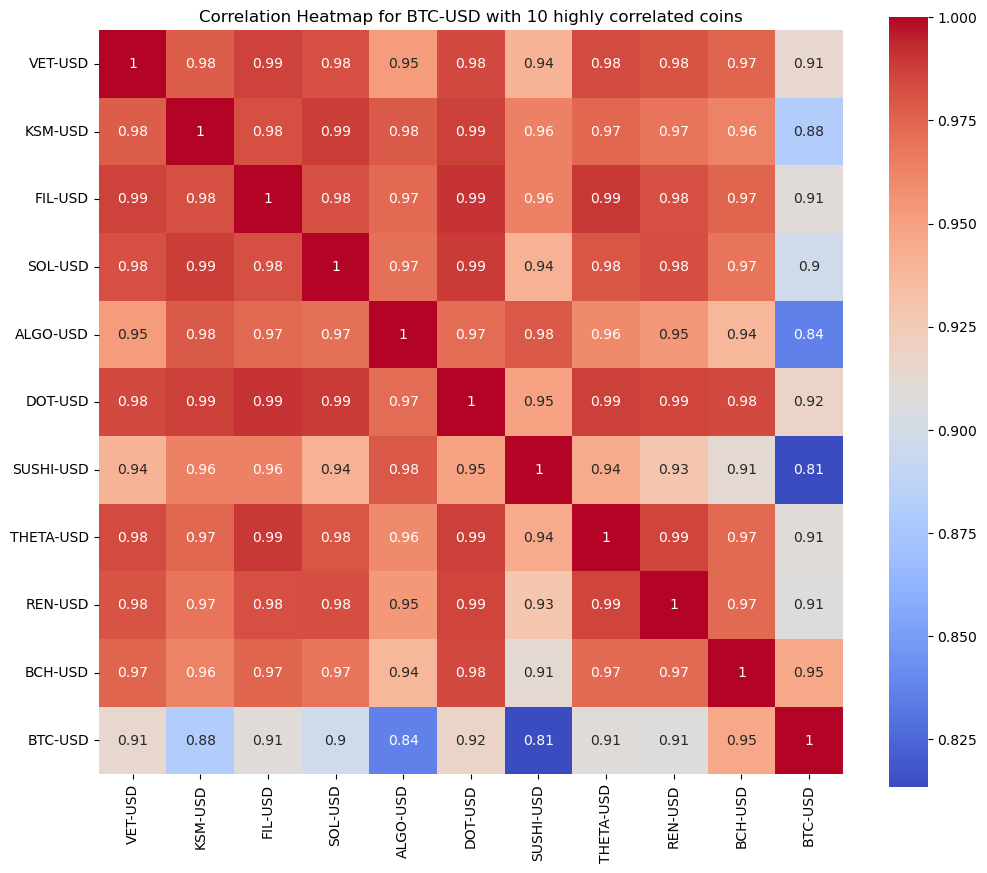

In [82]:
# Heat map showing high positive correlation with Bitcoin
def draw_heatmap(coin, correlation_cutoff):
    
    ticker = coin_map.get(coin)
    if not ticker:
        st.error("Selected coin is currently not available. Please select another coin.")
        return
    try:
        start = pd.to_datetime("2022-01-01")
        end = pd.to_datetime("now")
        df = yf.download(ticker, start=start, end=end).loc[:, 'Close']
        df.name = ticker  # set the name of the Series object to the ticker
    except Exception as e:
        st.error(f"Try later as an error occurred while trying to download data for {ticker}: {e}")
        return

    # Create a list of coins to consider, which includes the selected coin
    coins_of_interest = list(coin_map.values())

    # Get the correlation matrix for the coins of interest
    corr = pd.DataFrame({coin: df})
    for coin in coins_of_interest:
        temp_df = yf.download(coin, start=start, end=end).loc[:, 'Close']
        temp_df.name = coin
        corr[coin] = temp_df
        utc=True

    # Calculate correlation using only the Close column
    corr = corr.corr()

    # Filter correlation coefficients >= correlation_cutoff
    corr_cutoff = corr[(corr >= correlation_cutoff) & (corr < 1)]

    # Check if corr_cutoff is empty
    if corr_cutoff.empty:
        st.write(f"No coins highly correlated with {coin}.")
        return

    # Get the top 10 correlated coins
    top_coins = corr_cutoff[coin].sort_values(ascending=False).head(10).index

    # Add coin to the list of top coins
    top_coins = top_coins.append(pd.Index([ticker]))

    # Filter the correlation matrix for the top correlated coins
    corr = corr.loc[top_coins, top_coins]

    # Create heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, ax=ax)
    ax.set_title(f"Correlation Heatmap for {df.name} with 10 highly correlated coins")
    st.pyplot(fig)
    plt.show()

# Call the draw_heatmap function with the selected coin when a user selects a coin
draw_heatmap(coin, correlation_cutoff=0.7)

